In [1]:
#basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

#change the defaults for the pandas package to show all columns
pd.set_option('display.max_columns', None)

#for multiprocessing
from joblib import Parallel, delayed
import joblib

#for model initialization/performance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

#for anomaly detection
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

#for deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Precision, Recall
from keras import backend as K


# Instructions
At Capital One, you'll almost always be working with a diverse team, often including business analysts, engineers, product managers, and senior leaders. The ability to not just complete data science work, but also to explain and present your work is important.

With that in mind, please deliver your answers as if you were handing off work to another data scientist joining your team. Tying together your intent, code, analysis and results is the goal.

The following artifacts are valued:

- explanations of your intent, methods, conclusions and any assumptions
- clear, documented, and well-structured code
- instructions for running your code
- methods you attempted that didn't work
- ideas you didn't have time to complete but would have done with more time
- a thorough write up with any pertinent visualizations

We ask that any code written by others is sourced/cited appropriately. We are excited to review your work and your interpretation of the data.

## Data Science Challenge: Card Transactions!

This coding and analysis challenge is designed to test your skill and intuition analyzing realish world data. For the challenge, we will use credit card transactions data. Note that this dataset loosely resembles real transactional data from Capital One credit card customers, but the entities and relations within are purely fictional. No persons, places, or things lost their identity in the making of this dataset.

Required Questions: Please completely answer all four required questions.

### Question 1: Load

- **a)** Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here
- **b)** Please describe the structure of the data. Number of records and fields in each record?
- **c)** Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

Whenever I receive a structured data set, I always first convert the data to a Pandas DataFrame. The versatile Pandas package is amazing for data science, and has many useful built-in functions. Then, I do preliminatry investigations of the data using the .head(), .info(), and .describe() Pandas functions. These 3 summary functions are great for giving a quick look into the structure of the data set. For sufficiently small data sets, I then print all unique values for each column. Printing unique values is a great strategy for revealing inconsistencies in data formatting, and showing which columns are "useful" for modeling as is and which columns will need some feature engineering to become useful. I do all these steps below, and summarize my findings at the end of the section.

**Answer to a):** The Pandas package has very useful functions for reading in a variety of file types,
including line-deliminated JSON files. I downloaded the file from GitHub and read the file into the notebook as
a Pandas DataFrame below.


In [2]:
#read in the data with pandas
transactions = pd.read_json('transactions.txt', lines=True)


In [3]:
#number of records
print(len(transactions))

#fields in each record
print(len(transactions.columns))

786363
29


In [4]:
#show the first 5 rows and all columns
transactions.head()


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [5]:
#get information about all columns, including the data type of each column
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [6]:
#show the statistical summary of the numerical columns in the table
transactions.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [7]:
#print all unique values in each column to check for consistent/useful formatting
columns=transactions.columns

for col in columns:
    print(col)
    unique=transactions[col].unique()
    print(unique)
    #some of the lists are so long that they print in a truncated format
    #for these, just print the first 1000 unique values
    print(unique[:1000]) 
    print('')

accountNumber
[737265056 830329091 574788567 ... 899818521 638498773 732852505]
[737265056 830329091 574788567 924729945 984504651 114896048 482277829
 239577603 863358589 711536931 717666470 462848736 593712464 488934870
 782635414 558528521 130517112 222396921 203674388 571750534 303278424
 351299769 815239280 912643787 659080615 894468491 101380713 749990456
 805566864 304953744 277846799 715152804 736136951 419989841 693697093
 281639186 349190736 486180757 245118458 388159188 344604765 288118894
 657020139 642308149 988172671 631747753 389428961 935981871 806590674
 187912273 121492310 414020710 996362843 394834350 203542146 506826673
 299571848 156440228 887023475 687365478 537865382 754371149 668332358
 205681025 880531405 874805496 229093605 198331150 350439007 934061435
 243168614 717714059 356156197 745217385 676941584 574212417 764604017
 653689523 386732203 182600659 939875268 222122504 763639233 523001072
 655153797 790068807 790813979 869838014 395432279 408796250 9417830

['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:10:29']
['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39'
 '2016-12-10T02:14:50' '2016-03-24T21:04:46' '2016-04-19T16:24:27'
 '2016-05-21T14:50:35' '2016-06-03T00:31:21' '2016-06-10T01:21:46'
 '2016-07-11T10:47:16' '2016-09-07T20:22:47' '2016-12-07T16:34:04'
 '2016-12-14T10:00:35' '2016-12-20T18:38:23' '2016-12-28T06:43:01'
 '2016-01-02T11:19:46' '2016-01-16T01:01:27' '2016-01-26T14:04:22'
 '2016-01-29T07:17:39' '2016-01-29T07:33:15' '2016-01-29T21:44:33'
 '2016-02-06T08:16:46' '2016-02-12T03:47:24' '2016-02-22T17:32:13'
 '2016-02-28T15:53:52' '2016-02-28T16:43:46' '2016-03-02T21:49:24'
 '2016-03-05T22:24:50' '2016-03-09T14:41:15' '2016-03-10T00:59:51'
 '2016-03-14T06:24:48' '2016-04-01T20:08:33' '2016-04-05T21:44:57'
 '2016-04-14T05:00:43' '2016-04-26T04:33:33' '2016-04-28T08:08:33'
 '2016-05-03T21:11:14' '2016-05-12T00:45:51' '2016-05-24T

['US' '' 'CAN' 'MEX' 'PR']
['US' '' 'CAN' 'MEX' 'PR']

merchantCountryCode
['US' 'CAN' '' 'PR' 'MEX']
['US' 'CAN' '' 'PR' 'MEX']

posEntryMode
['02' '09' '05' '80' '90' '']
['02' '09' '05' '80' '90' '']

posConditionCode
['01' '08' '99' '']
['01' '08' '99' '']

merchantCategoryCode
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']

currentExpDate
['06/2023' '02/2024' '08/2025' '10/2029' '01/2020' '05/2020' '01/2021'
 '08/2032' '04/2020' '05/2023' '08/2024' '12/2031' '09/2027' '08/2022'
 '11/2027' '08/2028' '09/2032' '10/2028' '12/2021' '06/2033' '12/2019'
 '03/202

[   0.      9.37   40.75 ... 1095.04 1214.96 1233.85]
[0.000000e+00 9.370000e+00 4.075000e+01 8.150000e+01 1.222500e+02
 3.008000e+01 7.133000e+01 1.955400e+02 3.916100e+02 1.088600e+02
 1.370900e+02 1.632600e+02 3.784200e+02 3.514000e+01 5.958000e+01
 1.990200e+02 4.347600e+02 3.484000e+01 3.397700e+02 5.011600e+02
 5.698200e+02 4.364000e+01 8.389000e+01 2.990200e+02 3.704000e+02
 6.883500e+02 4.460000e+00 1.449600e+02 8.200000e+00 2.118800e+02
 2.163400e+02 2.428900e+02 1.695600e+02 2.195900e+02 3.621900e+02
 3.838500e+02 4.270300e+02 4.424500e+02 6.393900e+02 6.633000e+01
 7.079000e+01 1.222200e+02 1.676100e+02 3.387200e+02 5.734700e+02
 1.137220e+03 1.267840e+03 1.645000e+01 2.091000e+01 6.728000e+01
 6.341000e+01 1.048300e+02 1.421900e+02 2.500400e+02 2.914600e+02
 1.909500e+02 1.954100e+02 2.308100e+02 2.722300e+02 3.320000e+00
 4.474000e+01 4.920000e+01 5.029000e+01 1.168000e+02 1.514900e+02
 1.929100e+02 8.166000e+01 1.382200e+02 7.338000e+01 1.685700e+02
 1.900600e+02 2.278700

In [8]:
# get the unique value count for each column in the table
for col in columns:
    print(col)
    unique=transactions[col].unique()
    print(len(unique))
    print('')

accountNumber
5000

customerId
5000

creditLimit
10

availableMoney
521915

transactionDateTime
776637

transactionAmount
66038

merchantName
2490

acqCountry
5

merchantCountryCode
5

posEntryMode
6

posConditionCode
4

merchantCategoryCode
19

currentExpDate
165

accountOpenDate
1820

dateOfLastAddressChange
2184

cardCVV
899

enteredCVV
976

cardLast4Digits
5245

transactionType
4

echoBuffer
1

currentBalance
487318

merchantCity
1

merchantState
1

merchantZip
1

cardPresent
2

posOnPremises
1

recurringAuthInd
1

expirationDateKeyInMatch
2

isFraud
2



In [61]:
#the accountNumber and customerId columns are redundant
print(max(transactions['accountNumber']-transactions['customerId']))

0


In [9]:
# there are no null values in this table, only empty strings
# replace empty strings with null values
transactions=transactions.replace(r'^\s*$', np.nan, regex=True)

# get the null count for each column in the table
for col in columns:
    print(col)
    print(len(transactions[transactions[col].isnull()]))
    print('')

accountNumber
0

customerId
0

creditLimit
0

availableMoney
0

transactionDateTime
0

transactionAmount
0

merchantName
0

acqCountry
4562

merchantCountryCode
724

posEntryMode
4054

posConditionCode
409

merchantCategoryCode
0

currentExpDate
0

accountOpenDate
0

dateOfLastAddressChange
0

cardCVV
0

enteredCVV
0

cardLast4Digits
0

transactionType
698

echoBuffer
786363

currentBalance
0

merchantCity
786363

merchantState
786363

merchantZip
786363

cardPresent
0

posOnPremises
786363

recurringAuthInd
786363

expirationDateKeyInMatch
0

isFraud
0



In [10]:
# there are many columns that are currently object data types
# use pandas to convert the time columns to DateTime objects
time_cols='transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'
for col in time_cols:
    transactions[col]=pd.to_datetime(transactions[col])

#get information about all columns, including the data type of each column
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                781801 non-null  object        
 8   merchantCountryCode       785639 non-null  object        
 9   posEntryMode              782309 non-null  object        
 10  posConditionCode          785954 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

**Answer to b) and c):** There are 786363 records (or rows) in the transactions data frame, and each has 29 fields (or columns). I took the time to google all unknown columns. When modeling to detect credit card fraud, understanding the physical significance of each column is important for feature engineering. Column by column, I describe the structure of the data below including additional basic summary statistics for each field such as a count of null, minimum, maximum, and unique values:
- accountNumber
    - Description: Customer unique account number
    - Data type: Integer
    - Null count: 0
    - Statistical characterization: (not very useful other than indicating that the formatting of this column is consistent)
        - Minimum: 1.000881e+08
        - Maximum: 9.993896e+08
        - Mean: 5.372326e+08
        - Standard Deviation: 2.554211e+08
    - Unique value count: 5000
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent. The credit card number is a unique identifier that is not immediately useful in identifying fraud, and it's inclusion in training data could lead to overfitting. NOTE: This column is redundant with customerId
- customerId
    - Description: Customer unique ID number
    - Data type: Integer
    - Null count: 0
    - Statistical characterization: (not very useful other than indicating that the formatting of this column is consistent)
        - Minimum: 1.000881e+08
        - Maximum: 9.993896e+08	
        - Mean: 5.372326e+08
        - Standard Deviation: 2.554211e+08
    - Unique value count: 5000
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent. The credit card number is a unique identifier that is not immediately useful in identifying fraud, and it's inclusion in training data could lead to overfitting. NOTE: This column is redundant with accountNumber
- creditLimit
    - Description: Maximum amount a customer can spend using the card associated with the account, I am assuming the units are in USD
    - Data type: Integer
    - Null count: 0
    - Statistical characterization: 
        - Minimum: 250.00
        - Maximum: 50000.00
        - Mean: 10759.464459
        - Standard Deviation: 11636.174890
    - Unique value count: 10
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent.
- availableMoney
    - Description: Remaining credit (=creditLimit-total of transactions), I am assuming the units are in USD
    - Data type: Float
    - Null count: 0
    - Statistical characterization: 
        - Minimum:-1005.630000
        - Maximum:50000.00
        - Mean: 6250.725369
        - Standard Deviation: 8880.783989
    - Unique value count: 521915
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent.
- transactionDateTime
    - Description: Date and time of a particular transaction, I am assuming all dates/times are normalized to the same time zone
    - Data type: DateTime
    - Null count: 0
    - Unique value count: 776637
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent. However, the current formatting is not useful for modeling, and will need to be changed. In terms of fraud detection, a relevant feature to include in the models will be duplicate transactions which will be addressed in question 3.
- transactionAmount
    - Description: Credit spent on particular transaction, I am assuming the units are in USD
    - Data type: Float
    - Null count: 0
    - Statistical characterization: 
        - Minimum:0.00
        - Maximum:2011.54
        - Mean:136.985791
        - Standard Deviation:147.725569
    - Unique value count: 66038
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent.
- merchantName
    - Description: Name of merchant/company that is receiving the money
    - Data type: Object
    - Null count: 0
    - Unique value count: 2490
    - Notes on data consistency/usefulness for modeling: This is a very messy column with inconsistent formatting that will need to be addressed in order for the information to be useful in modeling. In particular, I will break this into multiple columns by:
        - separating the merchant name from the store number (ex. Walgreens \#572363 -> Walgreens, 572363)
        - flagging if the merchant is a website (ex. amazon.com -> Amazon, website=True)
- acqCountry
    - Description: Country of the acquiring bank or financial institution that processes the transaction on behalf of the merchant
    - Data type: Object
    - Null count: 4562
    - Unique value count: 5
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but there are null values which will need to be addressed.
- merchantCountryCode
    - Description: Country of the merchant that is receiving the money
    - Data type: Object
    - Null count: 724
    - Unique value count: 5
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but there are null values which will need to be addressed.
- posEntryMode
    - Description: Point of Sale Entry Mode, method used to enter the card information at the point of sale
        - see https://www.mreports.com/documentation/ac/nonmerchant/80451.htm for example. If these are the codes used by Capital One, then the codes correspond to...
        - 02= Magnetic stripe read.
        - 09=PAN entry via electronic commerce, including chip.
        - 05=Integrated circuit card read; card data reliable.
        - 80=Chip card was unable to process/magnetic stripe read default.
        - 90=Magnetic stripe read and extract content of Track 1 or Track 2 included (CVV check is possible).
    - Data type: Object
    - Null count: 4054
    - Unique value count: 6
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but there are null values which will need to be addressed.
- posConditionCode
    - Description: Code that indicates the condition under which a transaction was processed at the point of sale 
        - See https://www.mreports.com/documentation/ac/nonmerchant/80449.htm for example. If these are the codes used by Capital One, then the codes correspond to...
        - 01=Cardholder not present
        - 08=Mail/telephone order (includes Visa phone and reoccurring transactions)
        - 99=Not listed on the website
    - Data type: Object
    - Null count: 409
    - Unique value count: 4
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but there are null values which will need to be addressed.
- merchantCategoryCode
    - Description: Industry of merchant that is receiving the money
    - Data type: Object
    - Null count: 0
    - Unique value count: 19
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent.
- currentExpDate
    - Description: Expiration date for the credit card used in the transaction
    - Data type: DateTime
    - Null count: 0
    - Unique value count: 165
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but the data will need to be re-formatted into a more useful format.
- accountOpenDate
    - Description: Date when credit card account was opened
    - Data type: DateTime
    - Null count: 0
    - Unique value count: 1820
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but the data will need to be re-formatted into a more useful format.
- dateOfLastAddressChange
    - Description: Date when credit card holder last changed their address
    - Data type: Object
    - Null count: 0
    - Unique value count: 2184
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but the data will need to be re-formatted into a more useful format.
- cardCVV
    - Description: 3 digit security code for the credit card
    - Data type: Integer
    - Null count: 0
    - Statistical characterization: (not very useful other than indicating that the formatting of this column is consistent)
        - Minimum:100
        - Maximum:998
        - Mean:544.467338
        - Standard Deviation:261.524220
    - Unique value count: 899
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent. For fraud, the relevant quantity should be whether the cardCVV==enteredCVV not the actual number of the CVV, so I will combine these two columns.
- enteredCVV
    - Description: Security code entered by the card user when trying to complete the transaction
    - Data type: Integer
    - Null count: 0
    - Statistical characterization: (not very useful other than indicating that the formatting of this column is consistent)
        - Minimum:0
        - Maximum:998
        - Mean: 544.183857	
        - Standard Deviation: 261.551254	
    - Unique value count: 976
    - Notes on data consistency/usefulness for modeling: The data formatting is inconsistent but this does not matter because, for fraud, the relevant quantity should be whether the cardCVV==enteredCVV not the actual number of the CVV. So I will combine these two columns.
- cardLast4Digits
    - Description: Last 4 digits of the credit card number. 
    - Data type: Integer
    - Null count: 0
    - Statistical characterization: (not very useful other than indicating that the formatting of this column is consistent)
        - Minimum: 0
        - Maximum: 9998
        - Mean:4757.417799
        - Standard Deviation:2996.583810
    - Unique value count: 5245
    - Notes on data consistency/usefulness for modeling: The data formatting is inconsistent, with some entries not having 4 digits. Either this column has inconsistencies due to missing 0s or inconsistencies due to user error when entering the number. 
- transactionType
    - Description: Type of transaction 'PURCHASE', 'ADDRESS_VERIFICATION', or 'REVERSAL'
    - Data type: Object
    - Null count: 698
    - Unique value count: 4
    - Notes on data consistency/usefulness for modeling: The data formatting appears consistent, but there are null values which will need to be addressed.
- echoBuffer
    - Description: Field in a transaction message that is used to store or transmit additional information related to the transaction
    - Data type: Object
    - Null count: 786363
    - Unique value count: 1
    - Notes on data consistency/usefulness for modeling: This column is empty and will be removed for modeling.
- currentBalance
    - Description: Total amount owed on the credit account, sum of all purchases, cash advances, fees, interest, etc.
    - Data type: Float
    - Null count: 0
    - Statistical characterization: 
        - Minimum:0
        - Maximum:47498.81
        - Mean:4508.739089
        - Standard Deviation:6457.442068
    - Unique value count: 487318
    - Notes on data consistency/usefulness for modeling: The data formatting appears to be consistent.
- merchantCity
    - Description: City of the merchant that is receiving the money
    - Data type: Object
    - Null count: 786363
    - Unique value count: 1
    - Notes on data consistency/usefulness for modeling: This column is empty and will be removed for modeling.
- merchantState
    - Description: State of the merchant that is receiving the money
    - Data type: Object
    - Null count: 786363
    - Unique value count: 1
    - Notes on data consistency/usefulness for modeling: This column is empty and will be removed for modeling.
- merchantZip
    - Description: Zip code of the merchant that is receiving the money
    - Data type: Object
    - Null count: 786363
    - Unique value count: 1
    - Notes on data consistency/usefulness for modeling: This column is empty and will be removed for modeling.
- cardPresent
    - Description: Flag whether physical credit card was used at time of purchase
    - Data type: Boolean
    - Null count: 0
    - Unique value count: 2
    - Notes on data consistency/usefulness for modeling: The data formatting appears to be consistent.
- posOnPremises
    - Description: Flag whether the point of sale (POS) occurred at the merchant's physical location, usually indicating whether the customer was physically present for the purchase
    - Data type: Object
    - Null count: 786363
    - Unique value count: 1
    - Notes on data consistency/usefulness for modeling: This column is empty and will be removed for modeling.
- recurringAuthInd
    - Description: Flag specifying whether transaction was part of recurring payment/subscription service
    - Data type: Object
    - Null count: 786363
    - Unique value count: 1
    - Notes on data consistency/usefulness for modeling: This column is empty and will be removed for modeling.
- expirationDateKeyInMatch
    - Description: I think this is a flag of whether the expiration date of a credit card was manually entered during a transaction, but my google search was a bit unclear on this.
    - Data type: Boolean
    - Null count: 0
    - Unique value count: 2
    - Notes on data consistency/usefulness for modeling: The data formatting appears to be consistent.
- isFraud
    - Description: Flag as to whether the transaction was legitimate or fraudulent
    - Data type: Boolean
    - Null count: 0
    - Unique value count: 2
    - Notes on data consistency/usefulness for modeling: The data formatting appears to be consistent. There are far fewer fraudulent transactions than legitimate transactions but not so few as to necessitate anomaly detection methods. So I will implement techniques for imbalanced data sets in my modeling.
   

### Question 2: Plot
- **a)** Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
- **b)** Report any structure you find and any hypotheses you have about that structure.

Text(0, 0.5, 'Counts')

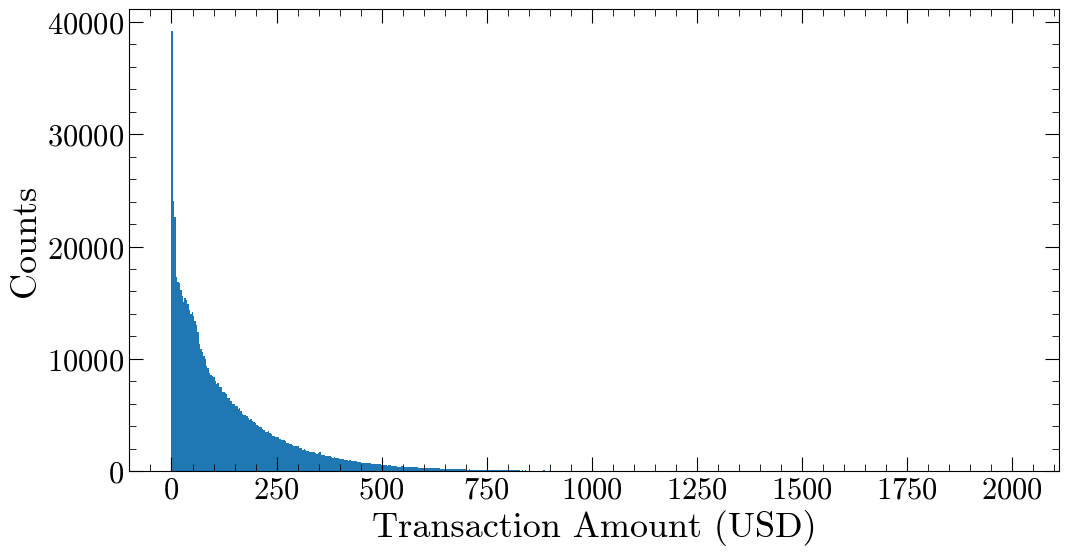

In [25]:
#Answer to a):

#Plot a histogram of the processed amounts of each transaction, the transactionAmount column. 
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.style.use('plotting.mplstyle')

out=ax.hist(transactions['transactionAmount'])
ax.set_xlabel('Transaction Amount (USD)')
ax.set_ylabel('Counts')

**Answer to b):** 
- The overall structure is that the number of transactions decreases with increasing transaction amount. This intuitively makes sense, since most daily purchases are smaller items such as groceries, meals, coffee, etc. So, there should be a higher frequency of occurrence of small purchases.
- There is a huge spike in the histogram for transactions with very small amounts. Most of the transactions in this spike (~65%) have transactionAmount=0. 
    - This spike exists when I plot only transactions flagged as real and does not exist when I plot only transactions flagged as fraudulent. So, this is likely a real effect, not credit scammers trying to test out if a card works.
    - I googled the sources of legitimate 0 USD transactions. Some potential explanations for legitimate 0 USD transactions are:
        - Authorization holds: Certain industries (especially hospitality and car rental companies) put 0 USD holds on credit cards to confirm that the card is valid. If this is the source of the spike, then we can confirm this by looking at the merchantCategoryCode column.
        - Different transaction types: transaction such as address verification transactions, fee adjustments, rewards points redemptions, gift card purchases, promotional offers with a buy 1 get 1 free deal, and refunds/cancellations can all result in 0 USD transactions. If this is the source of the spike, then we can confirm this by looking at the transactionType column.
        - Data entry errors: These of course can result in 0 USD transactions. In this case, this seems to be an unlikely source of the spike. Credit card transactions are recorded automattically by machines, making these sorts of entry errors unlikely. Additionally, in my above investigations, I found no signs of "weird" formatting in the transactionAmount column that would indicate likely data entry errors.
    - To check for 0 USD transactions due to authorization holds, I plotted categorical histograms showing the proportion of different merchantCategoryCodes in the full transactions data set and in the 0 USD spike. When comparing 0 USD to other transactions, I did not find a significant increase in any one particular category. This indicates that the primary source of the spike is likely not authorization holds in particular industries.
    - To check for 0 USD transactions due to different transaction types, I plotted categorical histograms showing the proportion of different transactionTypes in the full transactions data set and in the 0 USD spike. When comparing 0 USD to other transactions, I found that significantly more 0 USD transactions were Address Verifcation transactions, significantly fewer 0 USD transactions were purchases, and the proportion of reversal transactions amount both data sets was about the same. **This indicates that the likely source of the 0 USD spike is Address Verifcation transactions.**

Text(0, 0.5, 'Counts')

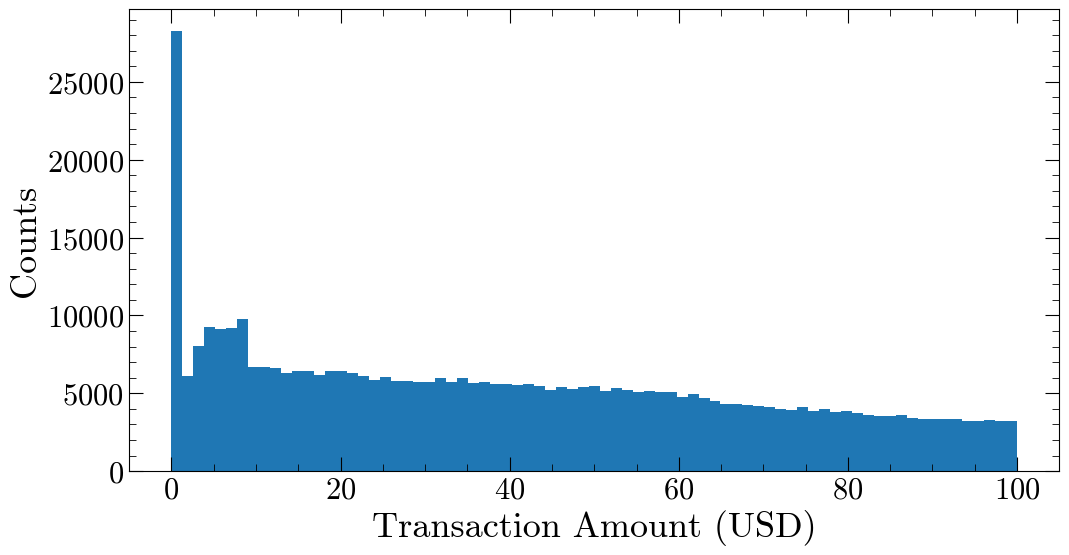

In [12]:
# plot only transaction amounts near the spike at low transaction amount values
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.style.use('plotting.mplstyle')

out=ax.hist(transactions.query('transactionAmount<100')['transactionAmount'])
ax.set_xlabel('Transaction Amount (USD)')
ax.set_ylabel('Counts')

In [13]:
# investigate transactions within the spike
smalltransaction=transactions.query('transactionAmount<2.5')
display(smalltransaction)

transcationis0=transactions.query('transactionAmount==0')
display(transcationis0)

print('Percent of 0 USD transactions within the spike=',(len(transcationis0)/len(smalltransaction))*100,' %')

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
17,574788567,574788567,2500,2428.67,2016-01-26 14:04:22,0.00,Convenient Auto Services,US,US,09,01,auto,2025-08-01,2015-10-13,2015-10-13,206,206,8522,ADDRESS_VERIFICATION,NaN,71.33,NaN,NaN,NaN,False,NaN,NaN,False,False
42,574788567,574788567,2500,1811.65,2016-05-28 04:42:54,2.20,Fast Auto Services,US,US,05,01,auto,2020-07-01,2015-10-13,2015-10-13,206,206,8522,PURCHASE,NaN,688.35,NaN,NaN,NaN,True,NaN,NaN,False,False
60,574788567,574788567,2500,2500.00,2016-09-02 07:57:44,0.00,Washington Tire,US,US,09,01,auto,2027-04-01,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
78,574788567,574788567,2500,2208.54,2016-10-29 11:01:00,0.00,Fast Tire,US,US,09,08,auto,2026-12-01,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,NaN,291.46,NaN,NaN,NaN,False,NaN,NaN,False,False
87,574788567,574788567,2500,2450.80,2016-12-11 21:22:03,1.09,Washington Auto Body,US,US,02,01,auto,2028-11-01,2015-10-13,2015-10-13,579,579,4219,PURCHASE,NaN,49.20,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786091,899818521,899818521,2500,438.12,2016-04-25 03:35:20,0.00,AMC #145832,US,US,05,01,entertainment,2021-12-01,2013-06-15,2013-06-15,551,551,5257,ADDRESS_VERIFICATION,NaN,2061.88,NaN,NaN,NaN,False,NaN,NaN,False,False
786172,638498773,638498773,10000,919.67,2016-07-06 04:07:54,0.00,Dunkin' Donuts #589280,US,US,02,01,fastfood,2029-12-01,2014-11-17,2014-11-17,175,175,321,ADDRESS_VERIFICATION,NaN,9080.33,NaN,NaN,NaN,False,NaN,NaN,False,False
786265,732852505,732852505,50000,49688.67,2016-02-16 23:02:52,0.00,Lyft,US,US,05,01,rideshare,2022-08-01,2012-08-23,2012-08-23,936,536,3783,ADDRESS_VERIFICATION,NaN,311.33,NaN,NaN,NaN,False,NaN,NaN,False,False
786270,732852505,732852505,50000,48811.18,2016-02-26 19:30:27,0.00,Lyft,US,US,05,01,rideshare,2029-04-01,2012-08-23,2012-08-23,939,939,3388,ADDRESS_VERIFICATION,NaN,1188.82,NaN,NaN,NaN,False,NaN,NaN,False,False


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
17,574788567,574788567,2500,2428.67,2016-01-26 14:04:22,0.0,Convenient Auto Services,US,US,09,01,auto,2025-08-01,2015-10-13,2015-10-13,206,206,8522,ADDRESS_VERIFICATION,NaN,71.33,NaN,NaN,NaN,False,NaN,NaN,False,False
60,574788567,574788567,2500,2500.00,2016-09-02 07:57:44,0.0,Washington Tire,US,US,09,01,auto,2027-04-01,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
78,574788567,574788567,2500,2208.54,2016-10-29 11:01:00,0.0,Fast Tire,US,US,09,08,auto,2026-12-01,2015-10-13,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,NaN,291.46,NaN,NaN,NaN,False,NaN,NaN,False,False
102,924729945,924729945,50000,50000.00,2016-10-23 14:00:41,0.0,apple.com,US,US,09,08,online_retail,2027-11-01,2014-07-25,2014-07-25,205,205,9459,ADDRESS_VERIFICATION,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
116,984504651,984504651,50000,48562.35,2016-01-08 19:40:01,0.0,Walgreens #417535,US,US,05,08,health,2029-11-01,2015-07-27,2015-07-27,640,640,8332,ADDRESS_VERIFICATION,NaN,1437.65,NaN,NaN,NaN,False,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786035,205026043,205026043,5000,3751.09,2016-11-27 18:09:39,0.0,Krispy Kreme #375200,US,US,80,01,fastfood,2030-01-01,2008-04-15,2008-04-15,359,359,258,ADDRESS_VERIFICATION,NaN,1248.91,NaN,NaN,NaN,False,NaN,NaN,False,False
786091,899818521,899818521,2500,438.12,2016-04-25 03:35:20,0.0,AMC #145832,US,US,05,01,entertainment,2021-12-01,2013-06-15,2013-06-15,551,551,5257,ADDRESS_VERIFICATION,NaN,2061.88,NaN,NaN,NaN,False,NaN,NaN,False,False
786172,638498773,638498773,10000,919.67,2016-07-06 04:07:54,0.0,Dunkin' Donuts #589280,US,US,02,01,fastfood,2029-12-01,2014-11-17,2014-11-17,175,175,321,ADDRESS_VERIFICATION,NaN,9080.33,NaN,NaN,NaN,False,NaN,NaN,False,False
786265,732852505,732852505,50000,49688.67,2016-02-16 23:02:52,0.0,Lyft,US,US,05,01,rideshare,2022-08-01,2012-08-23,2012-08-23,936,536,3783,ADDRESS_VERIFICATION,NaN,311.33,NaN,NaN,NaN,False,NaN,NaN,False,False


Percent of 0 USD transactions within the spike= 65.57594712616547  %


Text(0, 0.5, 'Counts')

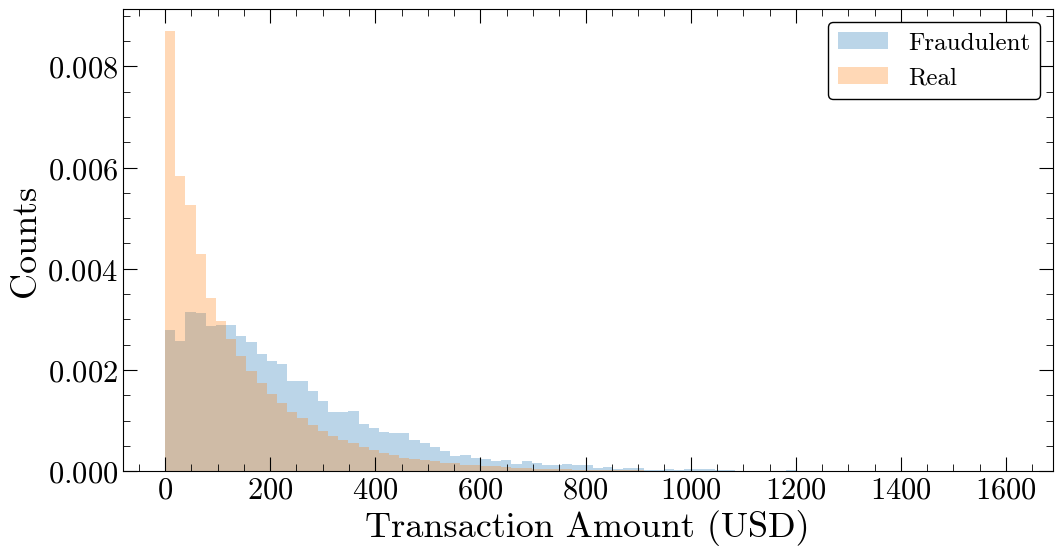

In [14]:
# plot transaction amounts separated by fraudulent and real transactions
# plot density histograms to see the relative proportions between data sets
# since there are far fewer cases of fraudulent transaction than legitimate ones
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.style.use('plotting.mplstyle')

(n, bins, patches) = ax.hist(transactions.query('isFraud==True')['transactionAmount'],density=True,alpha=0.3,label='Fraudulent')
out=ax.hist(transactions.query('isFraud==False')['transactionAmount'],bins=bins,density=True,alpha=0.3,label='Real')
ax.legend()
ax.set_xlabel('Transaction Amount (USD)')
ax.set_ylabel('Counts')

#the 0 USD spike occurs in the Real histogram but not in the Fraudulent one

Text(0, 0.5, 'Counts')

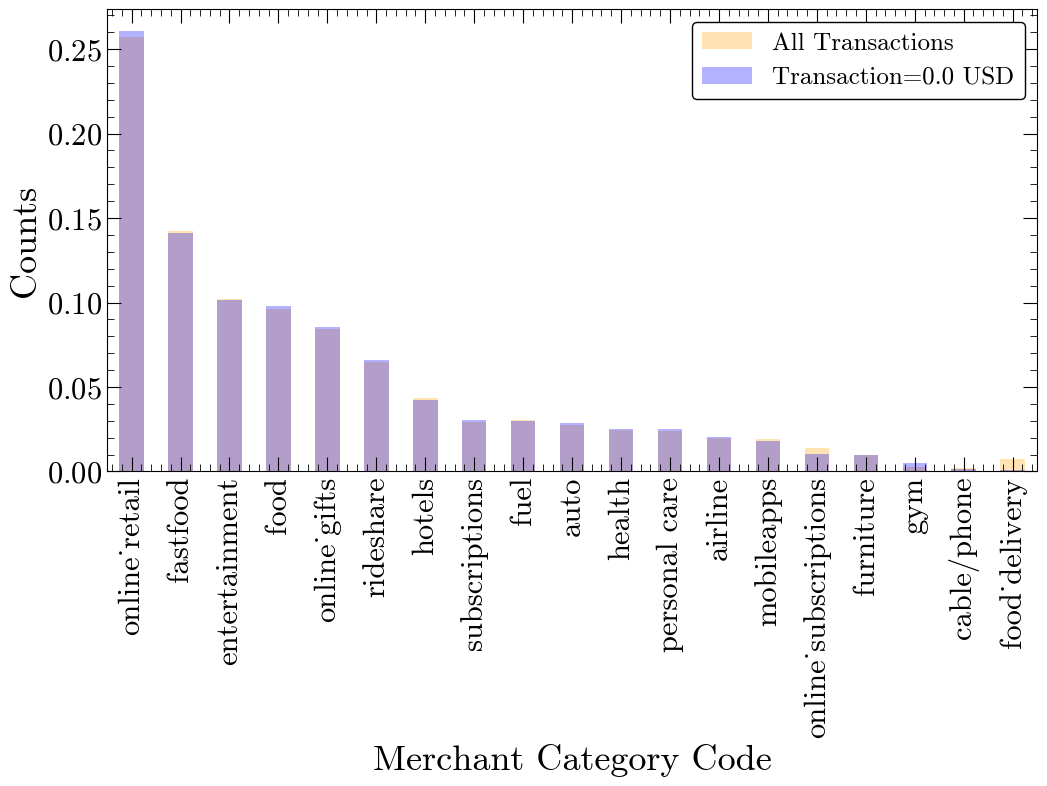

In [15]:
# plot the proportion of merchants in different categories for all transactions and 0 USD transactions

#normalize counts
trans_all_merchantCategoryCode=transactions['merchantCategoryCode'].value_counts()/transactions['merchantCategoryCode'].value_counts().sum()
trans_0_merchantCategoryCode=transcationis0['merchantCategoryCode'].value_counts()/transcationis0['merchantCategoryCode'].value_counts().sum()
#make sure order of each pd.Series is the same (otherwise will plot incorrect bar labels)
labels1=trans_all_merchantCategoryCode.index
labels2=trans_0_merchantCategoryCode.index
all_labels=labels2.append(labels1).unique()
trans_all_merchantCategoryCode=trans_all_merchantCategoryCode.reindex(all_labels)
trans_0_merchantCategoryCode=trans_0_merchantCategoryCode.reindex(all_labels)

#plot
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.style.use('plotting.mplstyle')
trans_all_merchantCategoryCode.plot(kind='bar',alpha=0.3,color='orange',label='All Transactions')
trans_0_merchantCategoryCode.plot(kind='bar',alpha=0.3,color='blue',label='Transaction=0.0 USD')
plt.xticks(rotation=90)
ax.legend()
ax.set_xlabel('Merchant Category Code')
ax.set_ylabel('Counts')

#there is no column for which there are significantly more 0 USD transactions than normal transactions

Text(0, 0.5, 'Counts')

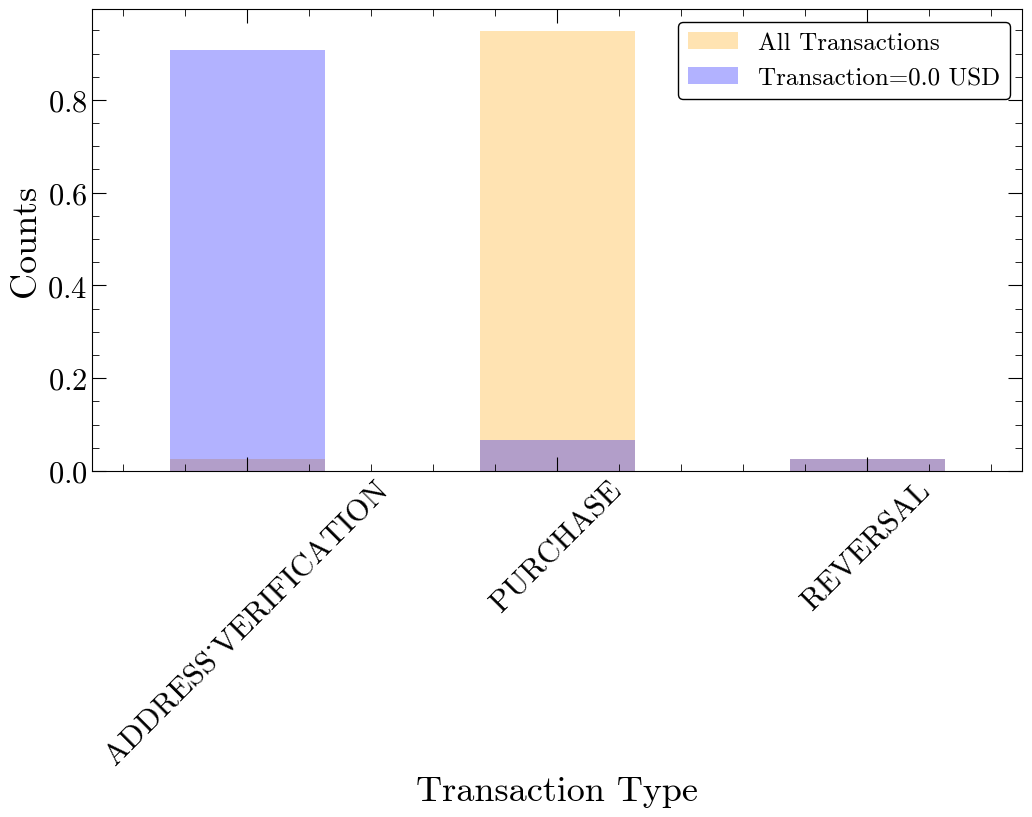

In [16]:
# plot the proportion of different transaction types for all transactions and 0 USD transactions

#normalize counts
trans_all_transactionType=transactions['transactionType'].value_counts()/transactions['transactionType'].value_counts().sum()
trans_0_transactionType=transcationis0['transactionType'].value_counts()/transcationis0['transactionType'].value_counts().sum()
#make sure order of each pd.Series is the same (otherwise will plot incorrect bar labels)
labels1=trans_all_transactionType.index
labels2=trans_0_transactionType.index
all_labels=labels2.append(labels1).unique()
trans_all_transactionType=trans_all_transactionType.reindex(all_labels)
trans_0_transactionType=trans_0_transactionType.reindex(all_labels)

#plot
fig, ax=plt.subplots(1,1,figsize=(12,6))
plt.style.use('plotting.mplstyle')
trans_all_transactionType.plot(kind='bar',alpha=0.3,color='orange',label='All Transactions')
trans_0_transactionType.plot(kind='bar',alpha=0.3,color='blue',label='Transaction=0.0 USD')
plt.xticks(rotation=45)
ax.legend()
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Counts')

# there are significantly more Address Verification transactions in the 0 USD data set
# and significantly fewer purchases
# Thus, address verification transactions are likely the source of the 0 USD spike


### Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.
- **a)** Can you programmatically identify reversed and multi-swipe transactions?
- **b)** What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
- **c)** Did you find anything interesting about either kind of transaction?

**Answer to a):** 
- To identify reversals, we can query the DataFrame with transactionType=='REVERSAL'. We can then find the corresponding purchase for each reversal by matching the accountNumber, transactionAmount, and merchantName across the purchases and reversals. 
- Multi-swipe transactions should only occur with purchases and are characerized by at least 2 identical charges (same accountNumber, transactionAmount, and merchantName) made back-to-back (within short transactionDateTime interval). I can group purchases by accountNumber, transactionAmount, and merchantName and calculate the difference in transaction time using built-in Pandas functions.
    - Note: Under the merchantCategoryCode field, there is a category for "subscriptions", which would result in many purchases with the same (accountNumber, transactionAmount, and merchantName) identifier but these purchases should not occur back-to-back. I do not remove subscriptions since it is still possible for an subscription merchant to charge multiple times.
    

In [17]:
#get reversals
reversals=transactions.query("transactionType=='REVERSAL'")
display(reversals)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,REVERSAL,NaN,299.02,NaN,NaN,NaN,True,NaN,NaN,False,False
73,574788567,574788567,2500,2432.72,2016-10-07 10:23:57,3.87,Eazy Repair,US,US,05,01,auto,2022-10-01,2015-10-13,2015-10-13,579,579,4219,REVERSAL,NaN,67.28,NaN,NaN,NaN,True,NaN,NaN,False,False
101,924729945,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,REVERSAL,NaN,168.57,NaN,NaN,NaN,False,NaN,NaN,False,False
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,3632.59,NaN,NaN,NaN,False,NaN,NaN,False,False
156,984504651,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,8090.70,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,899818521,2500,968.33,2016-09-29 02:04:32,10.05,cheapfast.com,US,US,02,99,online_retail,2031-02-01,2013-06-15,2013-06-15,421,421,3424,REVERSAL,NaN,1531.67,NaN,NaN,NaN,False,NaN,NaN,False,False
786120,638498773,638498773,10000,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,05,01,fastfood,2032-11-01,2014-11-17,2014-11-17,175,175,321,REVERSAL,NaN,201.79,NaN,NaN,NaN,True,NaN,NaN,False,False
786219,638498773,638498773,10000,5331.33,2016-11-03 04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,01,fastfood,2025-03-01,2014-11-17,2014-11-17,387,387,4635,REVERSAL,NaN,4668.67,NaN,NaN,NaN,True,NaN,NaN,False,False
786225,638498773,638498773,10000,4393.10,2016-11-06 22:54:25,49.39,Shake Shack #118502,US,US,05,01,fastfood,2029-06-01,2014-11-17,2014-11-17,387,387,4635,REVERSAL,NaN,5606.90,NaN,NaN,NaN,True,NaN,NaN,False,False


In [18]:
#find corresponding purchase for a given reversal

#get purchases
purchases=transactions.query("transactionType=='PURCHASE'")

#pick a reversal and get the identifying information
index=39
print('reversal')
display(reversals.iloc[index:index+1])
rev_trans=reversals.iloc[index]
acc_num=rev_trans['accountNumber']
trans_am=rev_trans['transactionAmount']
merchant_name=rev_trans['merchantName']

#match with corresponding purchase
purch_trans=purchases.query('accountNumber==@acc_num & transactionAmount==@trans_am & merchantName==@merchant_name')
print('')
print('purchase')
display(purch_trans)

reversal


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
1381,114896048,114896048,15000,3660.37,2016-10-02 19:30:43,26.58,Uber,US,US,09,01,rideshare,2029-08-01,2015-12-19,2016-06-10,773,773,8915,REVERSAL,NaN,11339.63,NaN,NaN,NaN,False,NaN,NaN,False,False



purchase


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
1355,114896048,114896048,15000,1511.64,2016-09-14 07:20:55,26.58,Uber,US,US,09,01,rideshare,2029-08-01,2015-12-19,2016-06-10,773,773,8915,PURCHASE,NaN,13488.36,NaN,NaN,NaN,False,NaN,NaN,False,False


In [19]:
# get multi-swipe transactions
# this only occurs for purchases, so use the purchases DataFrame
# find repeats of accountNumber, transactionAmount, and merchantName
potential_multiswipes = purchases[purchases.duplicated(subset=['accountNumber','transactionAmount','merchantName'],keep='first')]

# sort the potential multi-swipes by account number and transaction time
potential_multiswipes = potential_multiswipes.sort_values(by=['accountNumber', 'transactionDateTime'])

# define a time threshold for multi-swipes, I choose 1 minute
time_threshold = pd.Timedelta(seconds=60)

# create a combined key for grouping
potential_multiswipes['key'] = potential_multiswipes['accountNumber'].astype(str) + '_' + potential_multiswipes['transactionAmount'].astype(str) + '_' + potential_multiswipes['merchantName']

# identify multiswipes within the group of accountNumber/transactionAmount/merchantName
def identify_multiswipes(group):
    group['time_diff'] = group['transactionDateTime'].diff()
    # identify rows where time_diff is less than or equal to the threshold
    multiswipes = group[(group['time_diff'] <= time_threshold) & (group['time_diff'].notnull())]
    return multiswipes


# apply the function to each group
multiswipe_groups = potential_multiswipes.groupby('key', group_keys=False).apply(identify_multiswipes)
#reset the indices
indices=np.arange(0,len(multiswipe_groups))
multiswipe_groups.set_index(indices,inplace=True)

# display multi-swipes
# note that this method only displays 1 instance of the multi-swipe, not all corresponding multi-swipes
display(multiswipe_groups)


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,key,time_diff
0,102980467,102980467,50000,48673.41,2016-02-27 06:27:52,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,1326.59,NaN,NaN,NaN,False,NaN,NaN,False,False,102980467_333.92_Washington Post,0 days 00:00:38
1,111350183,111350183,2500,647.42,2016-09-23 10:36:45,237.71,Ray's Fries #61396,US,US,02,08,food,2021-02-01,2013-03-19,2013-03-19,473,473,617,PURCHASE,NaN,1852.58,NaN,NaN,NaN,True,NaN,NaN,False,False,111350183_237.71_Ray's Fries #61396,0 days 00:00:02
2,112078688,112078688,7500,1033.39,2016-05-11 13:02:26,57.19,Best Deli #329705,US,US,05,01,food,2026-06-01,2014-11-29,2016-05-10,439,439,4249,PURCHASE,NaN,6466.61,NaN,NaN,NaN,True,NaN,NaN,False,False,112078688_57.19_Best Deli #329705,0 days 00:00:58
3,114895301,114895301,5000,3776.86,2016-04-10 02:18:47,248.78,Wall Street News,US,US,05,01,subscriptions,2020-08-01,2013-12-08,2016-01-29,938,938,2640,PURCHASE,NaN,1223.14,NaN,NaN,NaN,False,NaN,NaN,False,False,114895301_248.78_Wall Street News,0 days 00:00:21
4,116906711,116906711,1000,493.10,2016-07-27 12:29:17,85.01,Quizno's #923583,US,US,02,01,fastfood,2024-05-01,2014-08-19,2016-05-25,506,506,4872,PURCHASE,NaN,506.90,NaN,NaN,NaN,True,NaN,NaN,False,False,116906711_85.01_Quizno's #923583,0 days 00:00:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,975447319,975447319,10000,1282.97,2016-11-03 23:42:31,392.54,Dinosaur Sandwitch Bar #303701,US,US,09,08,food,2020-06-01,2014-08-10,2014-08-10,578,578,1545,PURCHASE,NaN,8717.03,NaN,NaN,NaN,True,NaN,NaN,False,False,975447319_392.54_Dinosaur Sandwitch Bar #303701,0 days 00:00:42
216,982489153,982489153,20000,12304.41,2016-09-30 11:19:04,207.30,Subway #47890,US,US,02,01,fastfood,2020-06-01,2015-06-11,2016-09-06,374,374,7338,PURCHASE,NaN,7695.59,NaN,NaN,NaN,True,NaN,NaN,False,False,982489153_207.3_Subway #47890,0 days 00:01:00
217,985266351,985266351,7500,5793.24,2016-06-03 09:43:58,842.70,target.com,US,US,02,01,online_retail,2033-02-01,2012-03-01,2012-03-01,921,921,6017,PURCHASE,NaN,1706.76,NaN,NaN,NaN,False,NaN,NaN,False,False,985266351_842.7_target.com,0 days 00:00:31
218,988393082,988393082,250,196.95,2016-02-19 00:10:42,1.74,Walgreens #646490,US,US,05,08,health,2024-11-01,2015-08-25,2015-08-25,395,395,6156,PURCHASE,NaN,53.05,NaN,NaN,NaN,False,NaN,NaN,False,False,988393082_1.74_Walgreens #646490,0 days 00:00:06


In [20]:
#get one particular multi-swipe and check that everything is working as expected
index=0
print('multi-swipe')
display(multiswipe_groups.iloc[index:index+1])
multiswipe=multiswipe_groups.iloc[index]

acc_num=multiswipe['accountNumber']
trans_am=multiswipe['transactionAmount']
merchant_name=multiswipe['merchantName']

#match with all corresponding multi-swipes
multiswipe_purchases=purchases.query('accountNumber==@acc_num & transactionAmount==@trans_am & merchantName==@merchant_name')
print('')
print('all multi-swipes in group')
display(multiswipe_purchases)

#this is a good example of a subscription which is still a likely multi-swipe

multi-swipe


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,key,time_diff
0,102980467,102980467,50000,48673.41,2016-02-27 06:27:52,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,1326.59,NaN,NaN,NaN,False,NaN,NaN,False,False,102980467_333.92_Washington Post,0 days 00:00:38



all multi-swipes in group


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
32933,102980467,102980467,50000,49341.25,2016-02-27 06:26:19,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,658.75,NaN,NaN,NaN,False,NaN,NaN,False,False
32934,102980467,102980467,50000,49007.33,2016-02-27 06:27:14,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,992.67,NaN,NaN,NaN,False,NaN,NaN,False,False
32935,102980467,102980467,50000,48673.41,2016-02-27 06:27:52,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,1326.59,NaN,NaN,NaN,False,NaN,NaN,False,False


**Answer to b)**
- I assume all reversals are paired with exactly 1 purchase. In this case, we need only sum the number of transactions and transaction amount for each reversal (since the first purchase needs to be neglected). This results in 20303 reversal transactions totalling 2,821,792.50 USD.
- Since each multi-swipe may have more than just 2 occurrences, I have to loop through and sum over all multi-swipes in each group, excluding one of the swipes in each group as the "normal" transaction. This results in 441 multi-swipe transactions totalling 65,638.88 USD.


In [21]:
# number of reversal transactions
print(len(reversals))

#total dollar amount of reversals
print(reversals['transactionAmount'].sum())

20303
2821792.5


In [22]:
#get all multi-swipes in each group
def get_all_multiswipes(index):
    multiswipe=multiswipe_groups.iloc[index]

    acc_num=multiswipe['accountNumber']
    trans_am=multiswipe['transactionAmount']
    merchant_name=multiswipe['merchantName']

    #match with all corresponding multi-swipes
    multiswipe_purchases=purchases.query('accountNumber==@acc_num & transactionAmount==@trans_am & merchantName==@merchant_name')
    #reset the indices
    indices=np.arange(0,len(multiswipe_purchases))
    multiswipe_purchases.set_index(indices,inplace=True)

    return(multiswipe_purchases)

num_multiswipes=0
amount_multiswipes=0
for i in range(len(multiswipe_groups)):
    index=i
    all_multiswipes=get_all_multiswipes(index)
    for j in range(len(all_multiswipes)):
        if j==0:
            #skip first "normal" transaction
            pass
        else:
            #add 1 to multi-swipe count
            num_multiswipes+=1
            #add transaction amount to total USD amount of multi-swipes
            amount_multiswipes+=all_multiswipes['transactionAmount'].to_list()[j]
            
print(num_multiswipes)
print(amount_multiswipes)

441
65638.88000000005


**Answer to c)**
- I searched the distributions of all numerical and categorical variables (except merchant name) for reversals, compared to the set of all transactions, and found that certain merchant category codes (fuel, mobile apps, online subscriptions, food delivery, gym, cable/phone) had far lower rates of reversals when compared across all transactions.
- I searched the distributions of all numerical and categorical variables (except merchant name) for multiswipes, compared to the set of all transactions, and found
    - multiswipes have more posEntryMode=09,80 and less 02,90
    - multiswipes have more posConditionCode=01 and less 80
    - multiswipes occur more often in some merchant category codes (entertainment, online gifts, food, subscriptions, health,auto,airlines) and less often in others (fast food, rideshare, hotels, furniture, fuel, mobile apps, online subscriptions, food delivery, gym, cell phone)
    - multiswipes only occur with purchases
    - multiswipes are more likely to occur when the card is present
    - multiswipes are more likely to be fraud

In [23]:
def plot_against_all_transactions_numerical(subset,column):
    # plot the distribution of a subset of transactions properties against the distribution of all transactions
    # plot density histograms to see the relative proportions between data sets
    # for numerical variables
    fig, ax=plt.subplots(1,1,figsize=(12,6))
    plt.style.use('plotting.mplstyle')

    (n, bins, patches) = ax.hist(subset[column],density=True,alpha=0.3,label='Subset')
    out=ax.hist(transactions[column],bins=bins,density=True,alpha=0.3,label='All Transactions')
    ax.legend()
    ax.set_xlabel(column)
    ax.set_ylabel('Count Density')
    
    plt.show()

In [28]:
def plot_against_all_transactions_categorical(subset,column):
    # plot the distribution of a subset of transactions properties against the distribution of all transactions
    # plot density histograms to see the relative proportions between data sets
    # for categorical variables
    
    #normalize counts
    transactions_cat=transactions[column].value_counts()/transactions[column].value_counts().sum()
    subset_cat=subset[column].value_counts()/subset[column].value_counts().sum()
    #make sure order of each pd.Series is the same (otherwise will plot incorrect bar labels)
    labels1=transactions_cat.index
    labels2=subset_cat.index
    all_labels=labels2.append(labels1).unique()
    transactions_cat=transactions_cat.reindex(all_labels)
    subset_cat=subset_cat.reindex(all_labels)

    #plot
    fig, ax=plt.subplots(1,1,figsize=(12,6))
    plt.style.use('plotting.mplstyle')
    subset_cat.plot(kind='bar',alpha=0.3,color='blue',label='Subset')
    transactions_cat.plot(kind='bar',alpha=0.3,color='orange',label='All Transactions')
    plt.xticks(rotation=90)
    ax.legend()
    ax.set_xlabel(column)
    ax.set_ylabel('Count Density')
    
    plt.show()

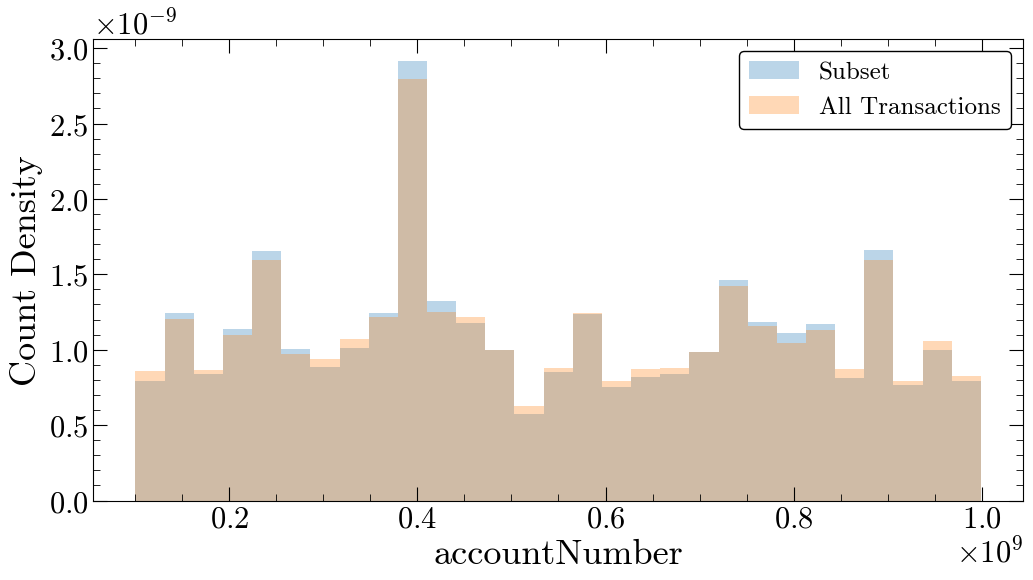

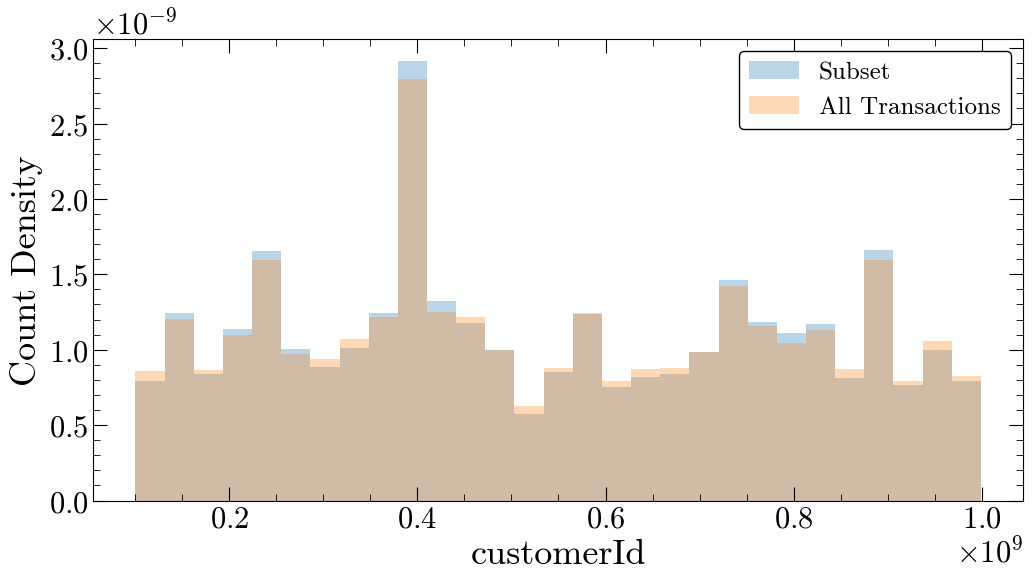

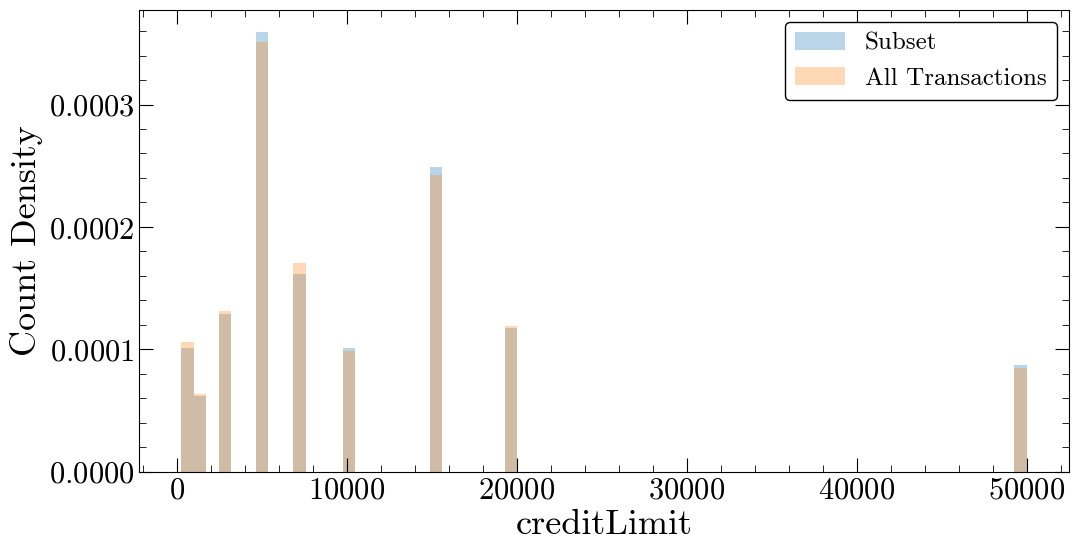

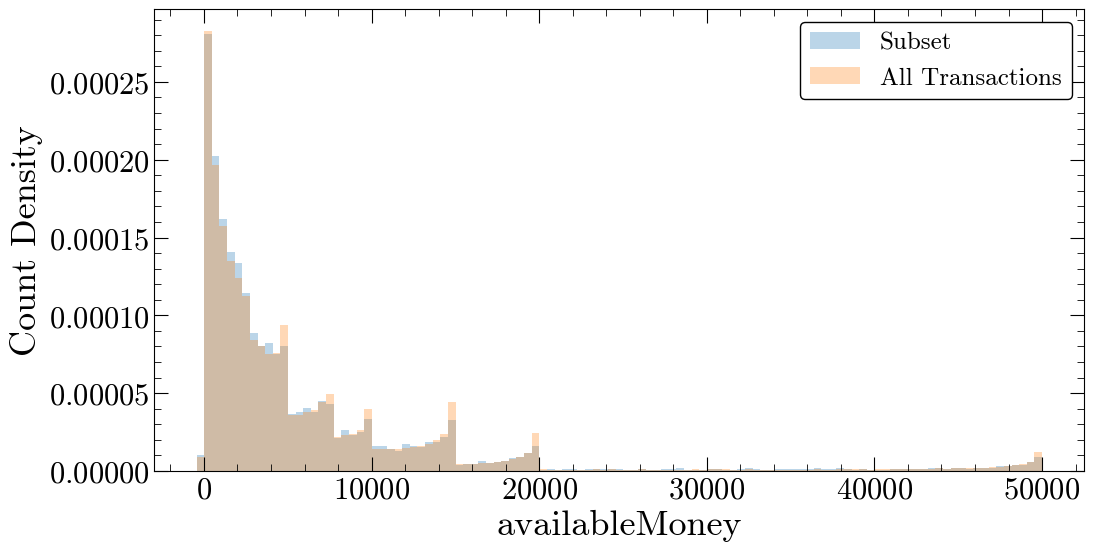

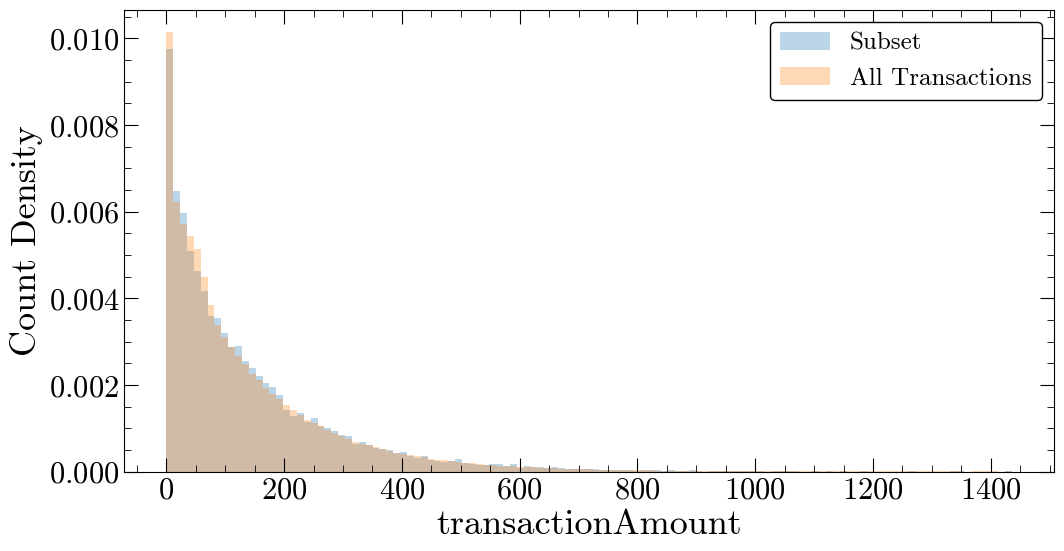

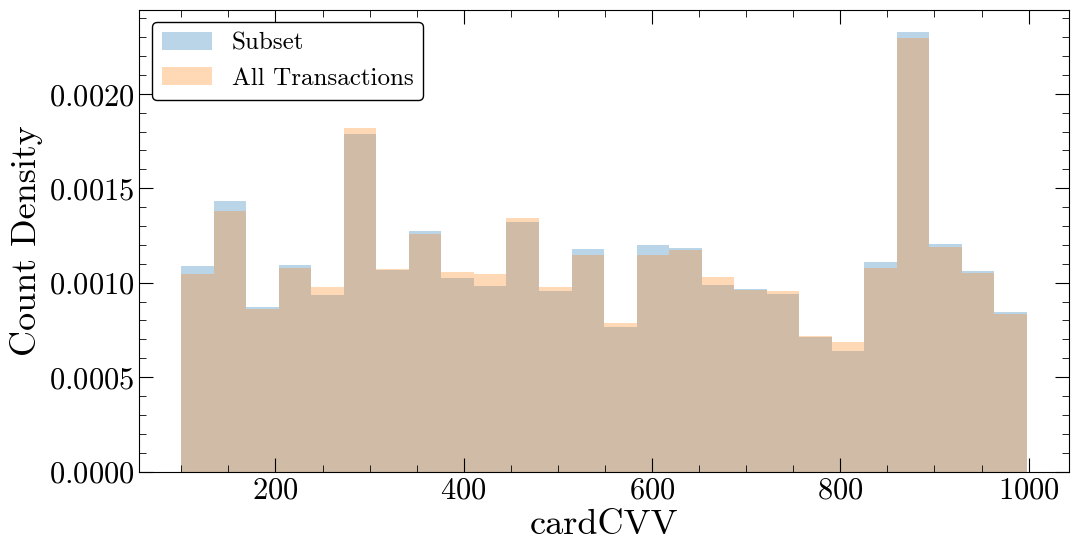

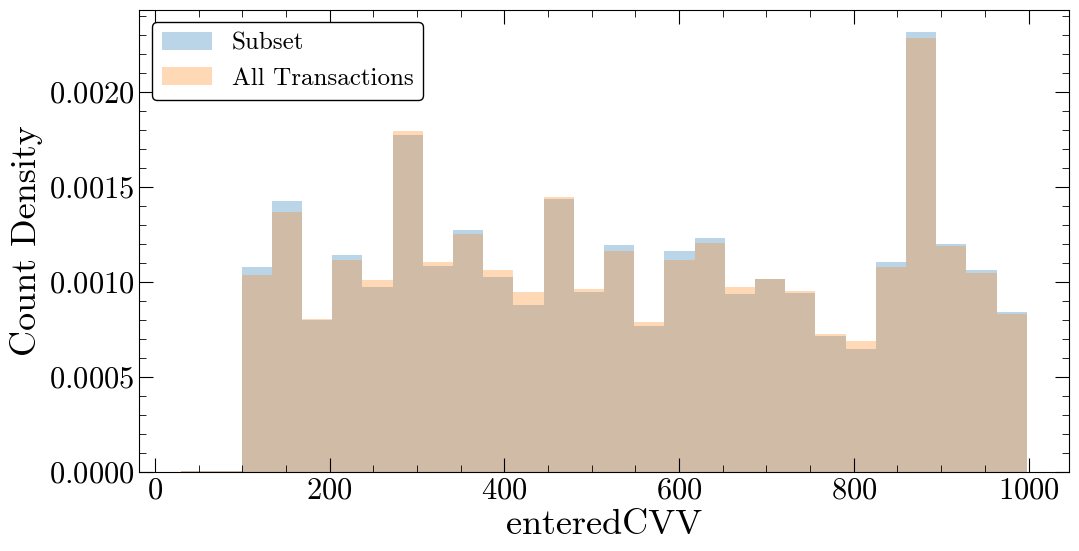

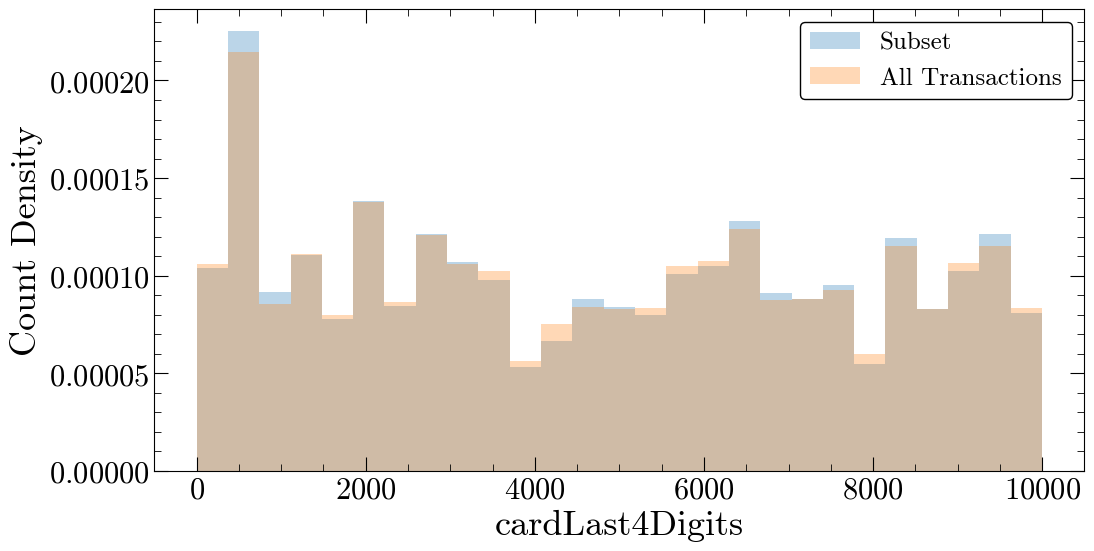

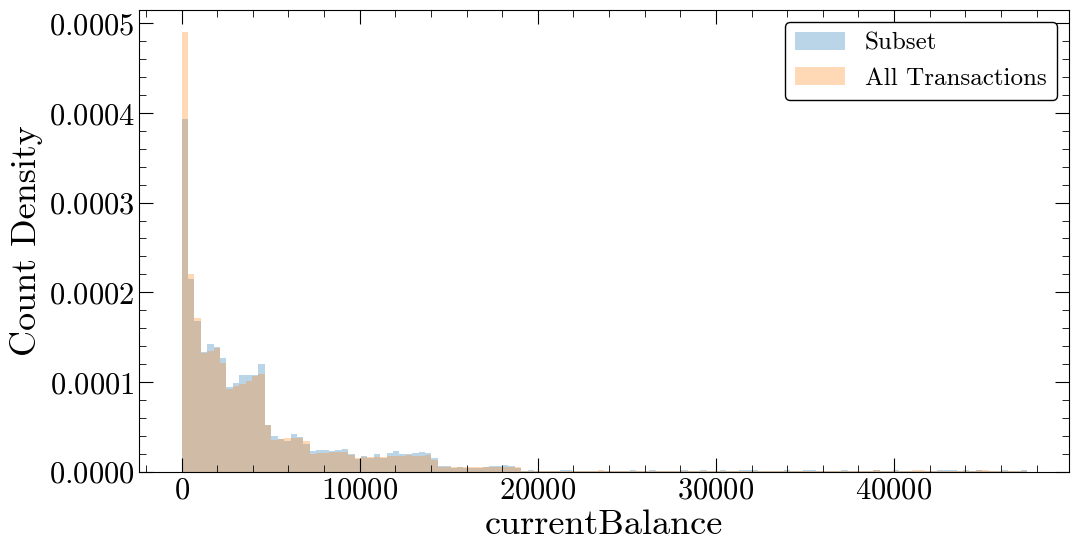

In [27]:
#compare distribution of numerical fields for reversal transactions to all transactions
numerical_cols=['accountNumber', 'customerId', 'creditLimit', 'availableMoney','transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
                'currentBalance']
for col in numerical_cols:
    plot_against_all_transactions_numerical(reversals,col)

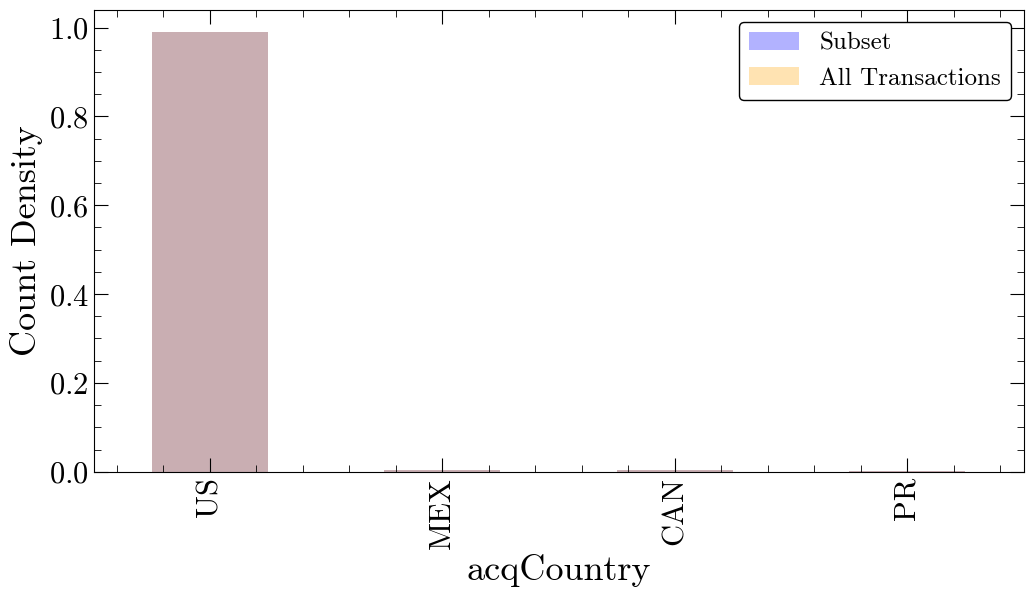

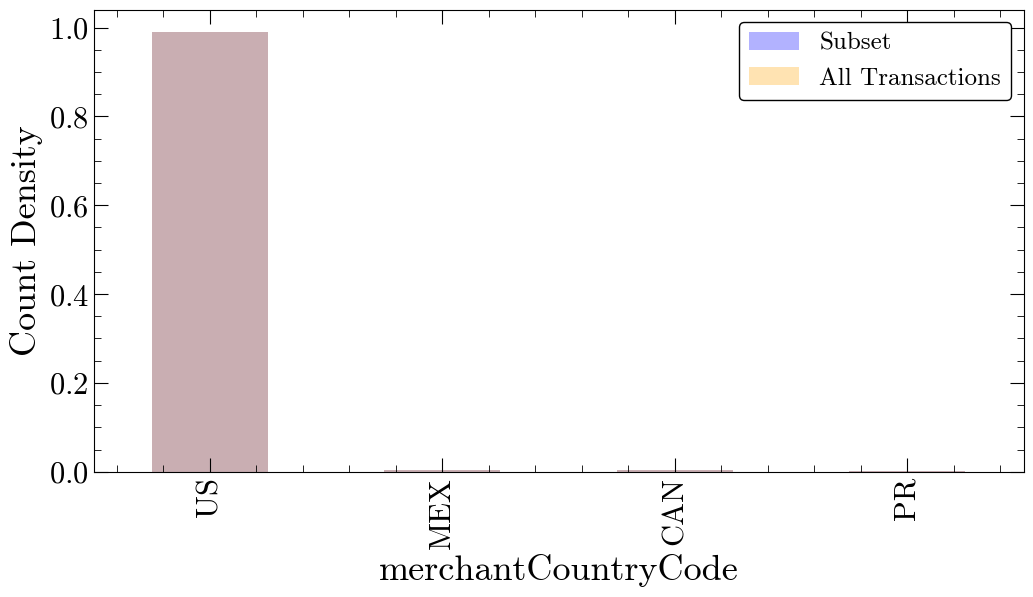

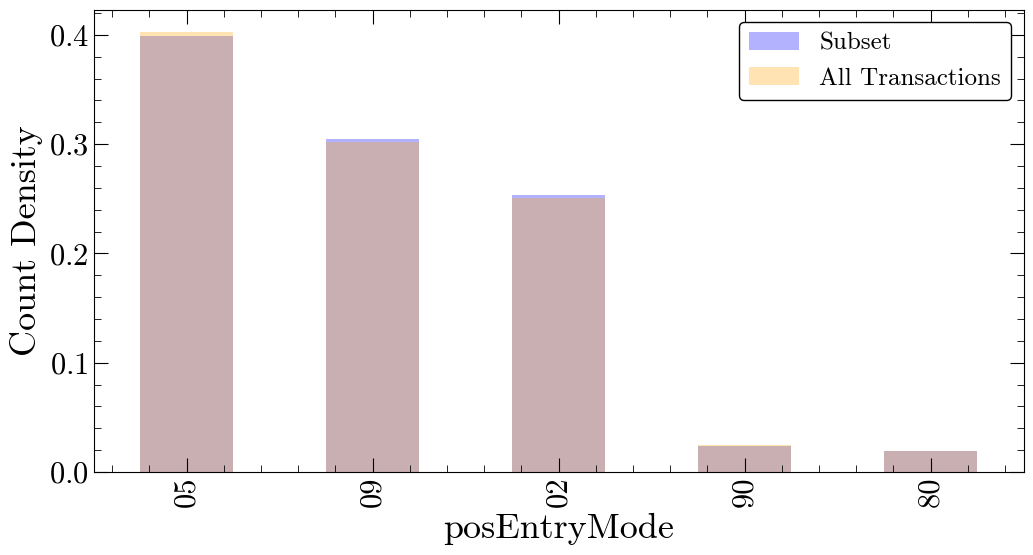

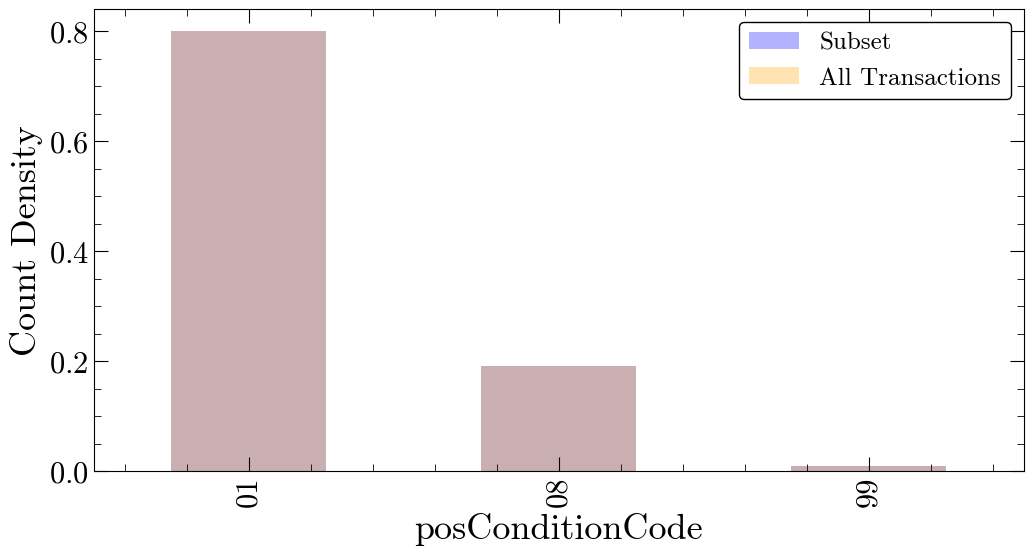

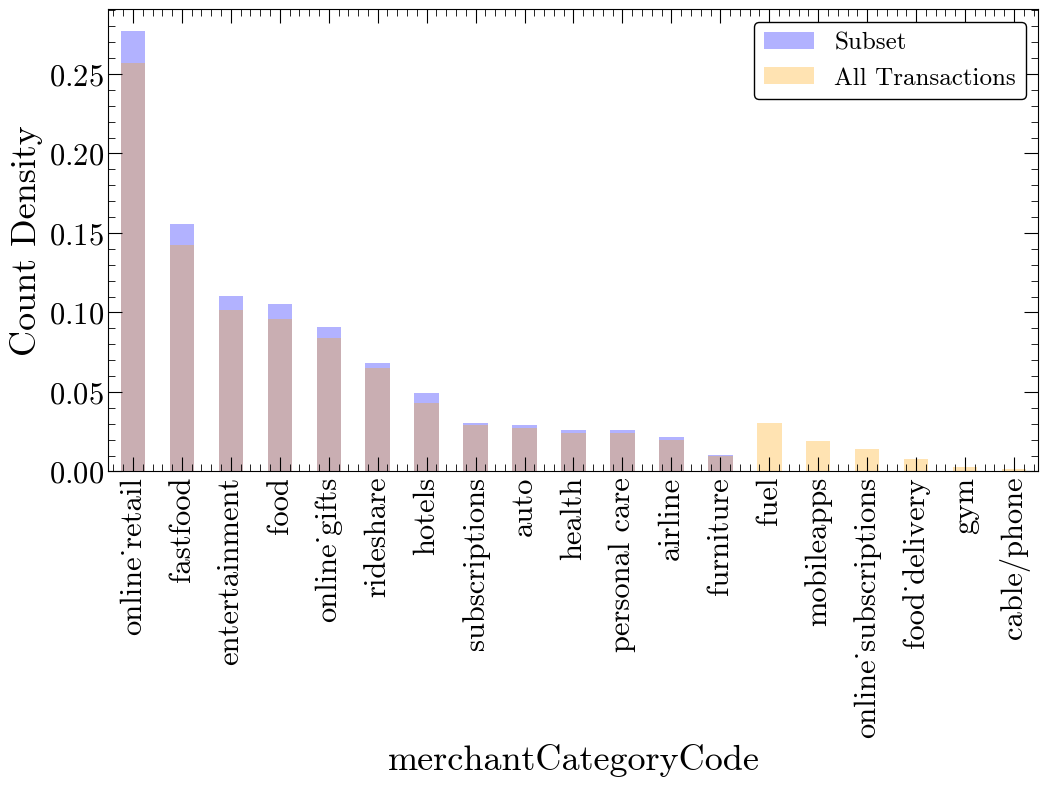

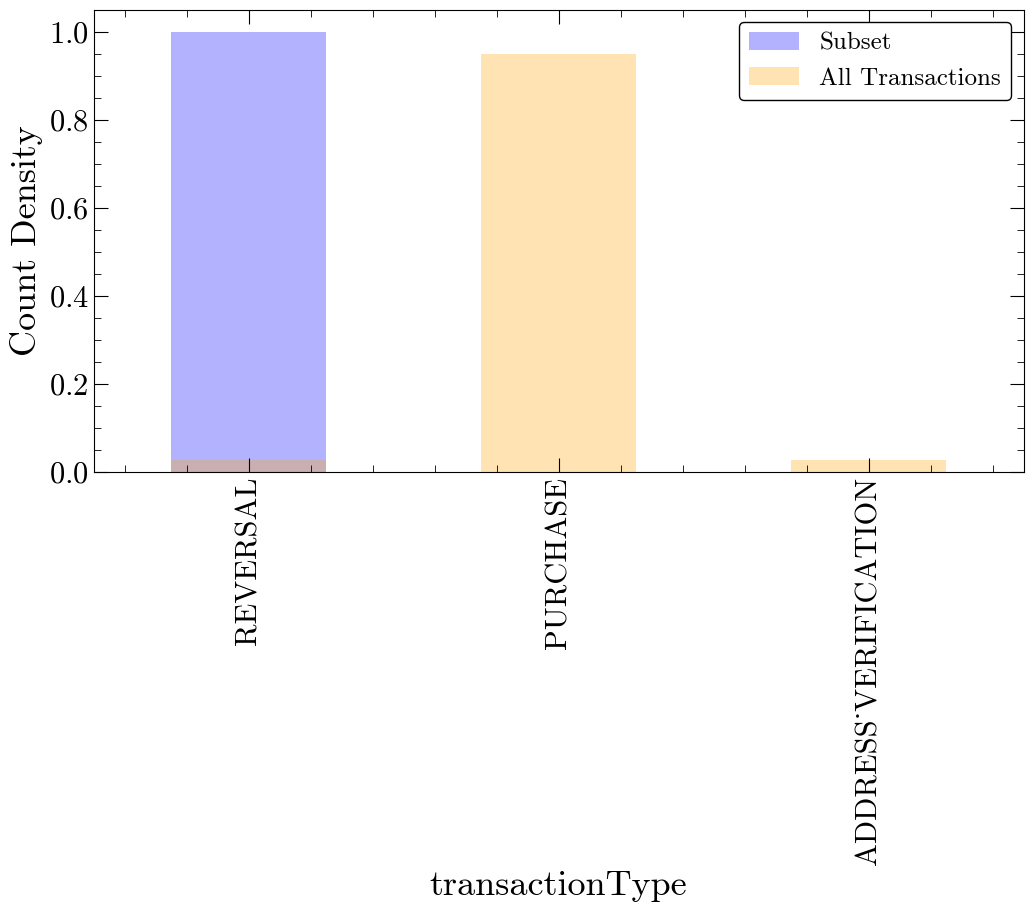

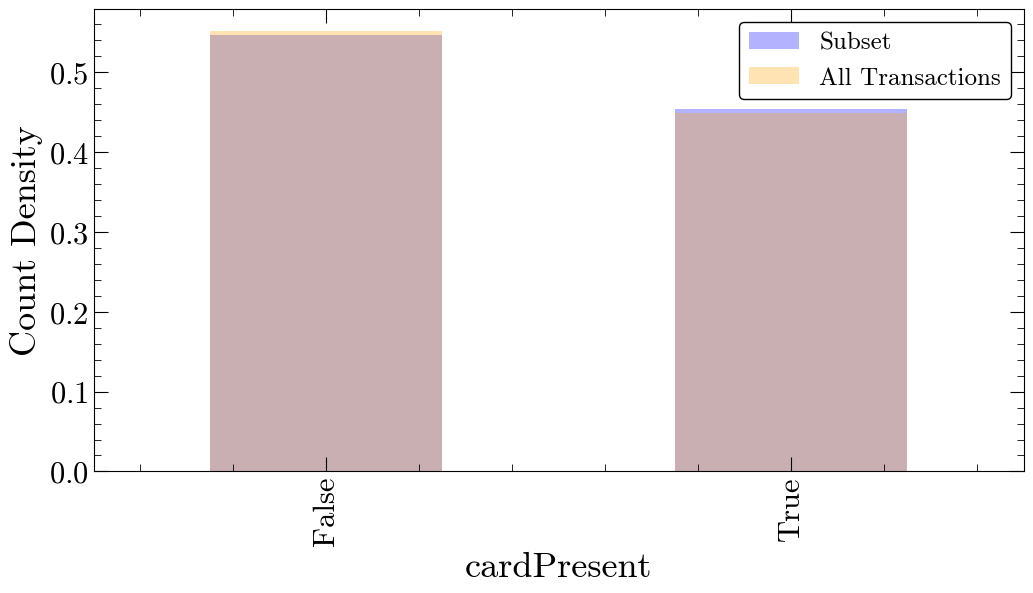

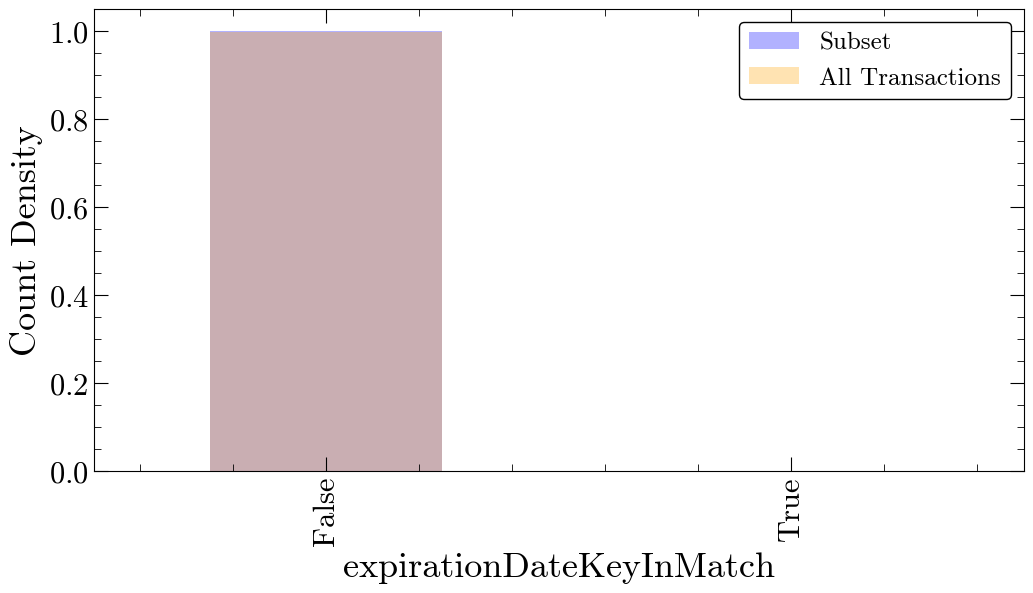

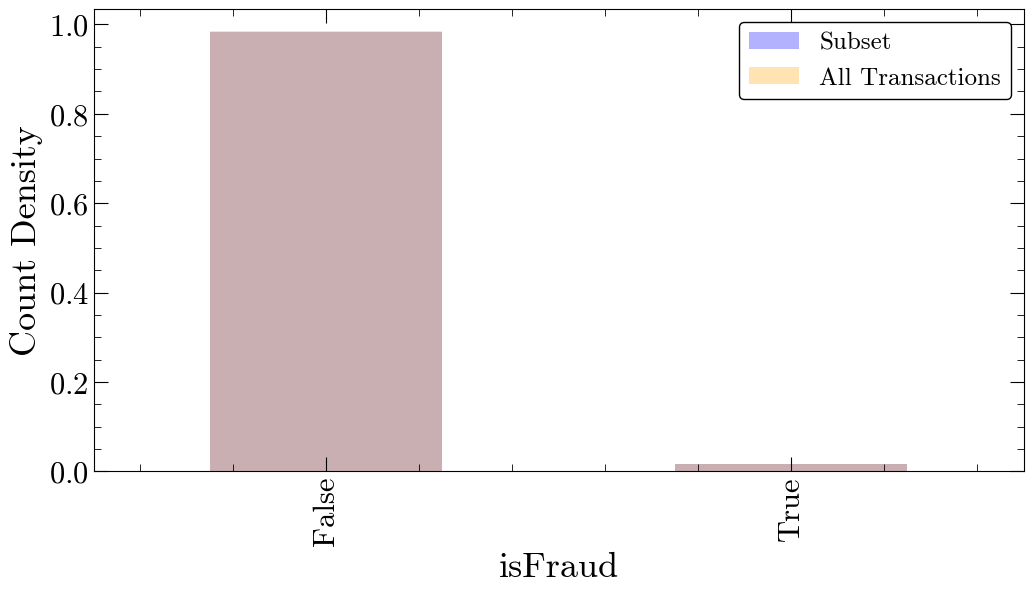

In [34]:
#compare distribution of categorical fields for reversal transactions to all transactions
categorical_cols=['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode','merchantCategoryCode',
                  'transactionType', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud']
for col in categorical_cols:
    plot_against_all_transactions_categorical(reversals,col)

#note, there are too many unique merchant names to include them in this plot

In [38]:
# get all multiswipes
all_multiswipes=pd.DataFrame()
for i in range(len(multiswipe_groups)):
    index=i
    all_multiswipes=pd.concat([all_multiswipes, get_all_multiswipes(index)])

display(all_multiswipes)   

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,102980467,102980467,50000,49341.25,2016-02-27 06:26:19,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,658.75,NaN,NaN,NaN,False,NaN,NaN,False,False
1,102980467,102980467,50000,49007.33,2016-02-27 06:27:14,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,992.67,NaN,NaN,NaN,False,NaN,NaN,False,False
2,102980467,102980467,50000,48673.41,2016-02-27 06:27:52,333.92,Washington Post,US,US,02,01,subscriptions,2033-08-01,2015-01-08,2015-01-08,708,708,6402,PURCHASE,NaN,1326.59,NaN,NaN,NaN,False,NaN,NaN,False,False
0,111350183,111350183,2500,1122.84,2016-09-23 10:35:10,237.71,Ray's Fries #61396,US,US,02,08,food,2021-02-01,2013-03-19,2013-03-19,473,473,617,PURCHASE,NaN,1377.16,NaN,NaN,NaN,True,NaN,NaN,False,False
1,111350183,111350183,2500,885.13,2016-09-23 10:36:43,237.71,Ray's Fries #61396,US,US,02,08,food,2021-02-01,2013-03-19,2013-03-19,473,473,617,PURCHASE,NaN,1614.87,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,988393082,988393082,250,198.69,2016-02-19 00:10:36,1.74,Walgreens #646490,US,US,05,08,health,2024-11-01,2015-08-25,2015-08-25,395,395,6156,PURCHASE,NaN,51.31,NaN,NaN,NaN,False,NaN,NaN,False,False
2,988393082,988393082,250,196.95,2016-02-19 00:10:42,1.74,Walgreens #646490,US,US,05,08,health,2024-11-01,2015-08-25,2015-08-25,395,395,6156,PURCHASE,NaN,53.05,NaN,NaN,NaN,False,NaN,NaN,False,False
0,993237077,993237077,7500,6368.85,2016-01-27 10:24:47,37.53,In-N-Out #710537,US,US,05,01,fastfood,2020-06-01,2015-08-10,2015-08-10,796,796,3620,PURCHASE,NaN,1131.15,NaN,NaN,NaN,True,NaN,NaN,False,False
1,993237077,993237077,7500,6331.32,2016-01-27 10:24:55,37.53,In-N-Out #710537,US,US,05,01,fastfood,2020-06-01,2015-08-10,2015-08-10,796,796,3620,PURCHASE,NaN,1168.68,NaN,NaN,NaN,True,NaN,NaN,False,False


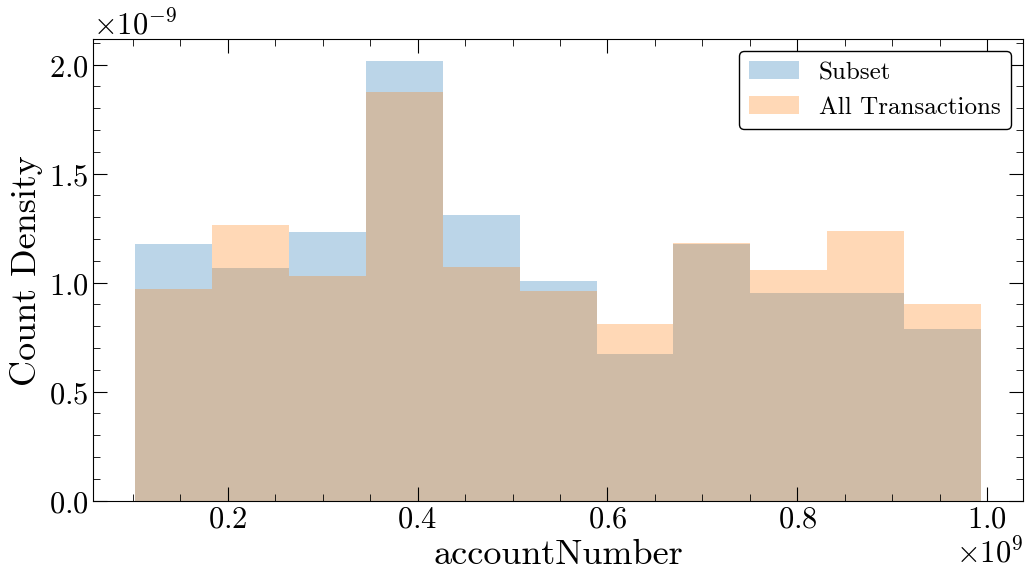

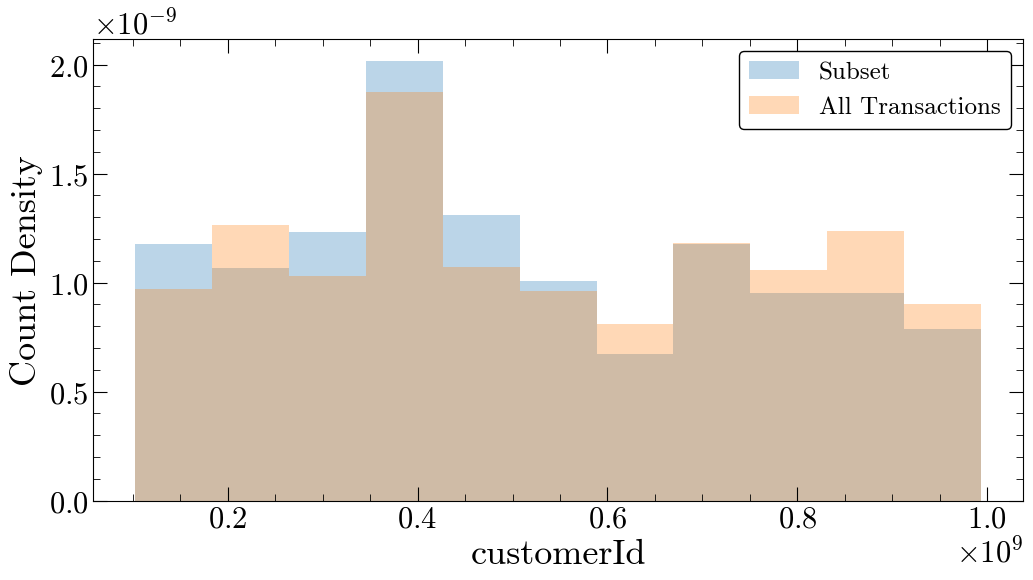

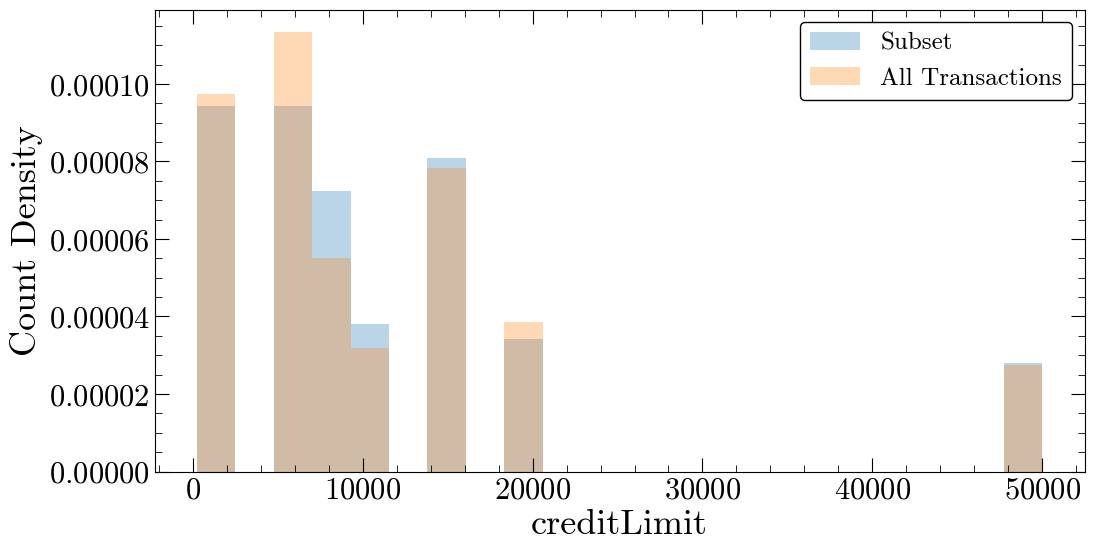

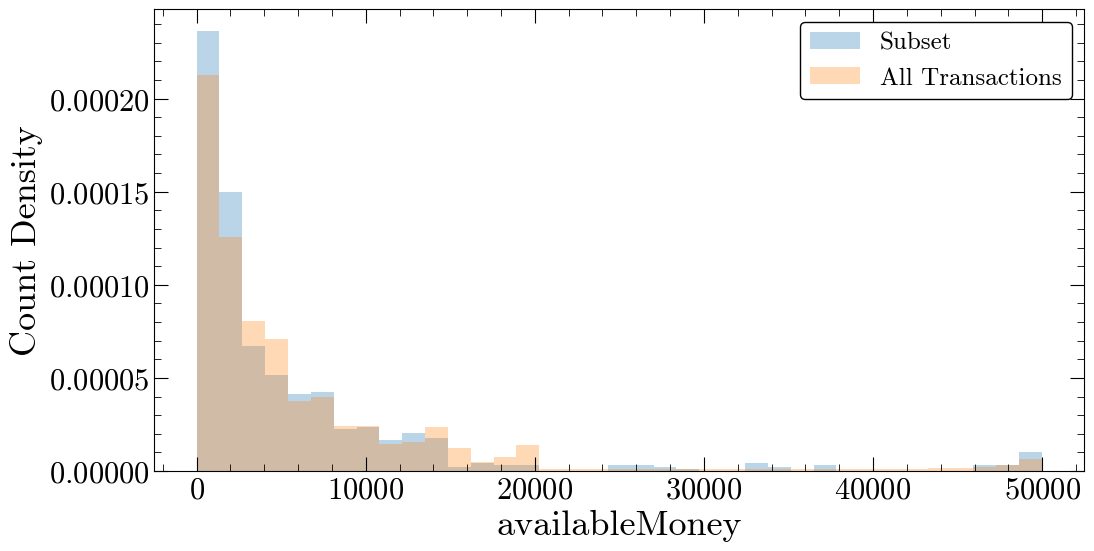

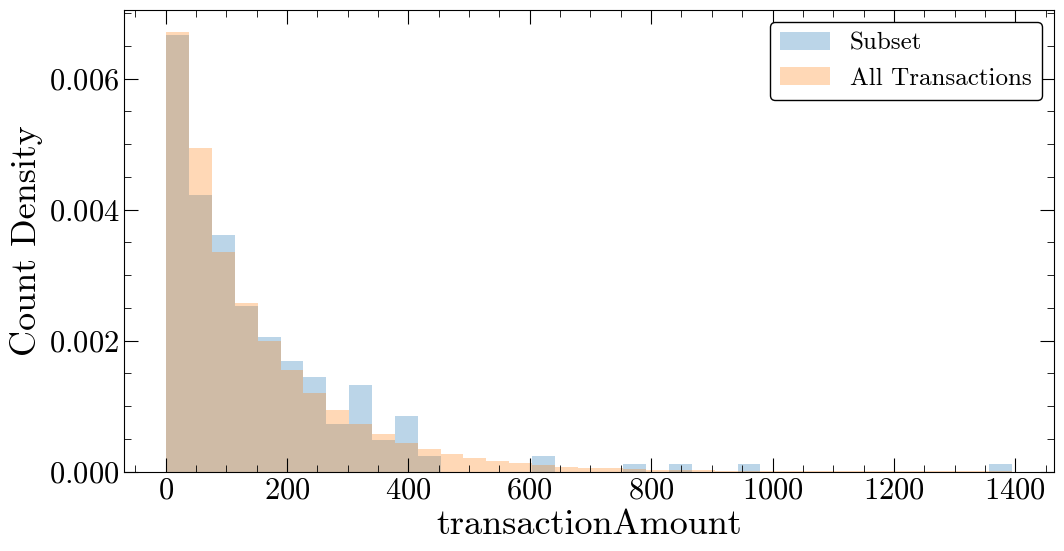

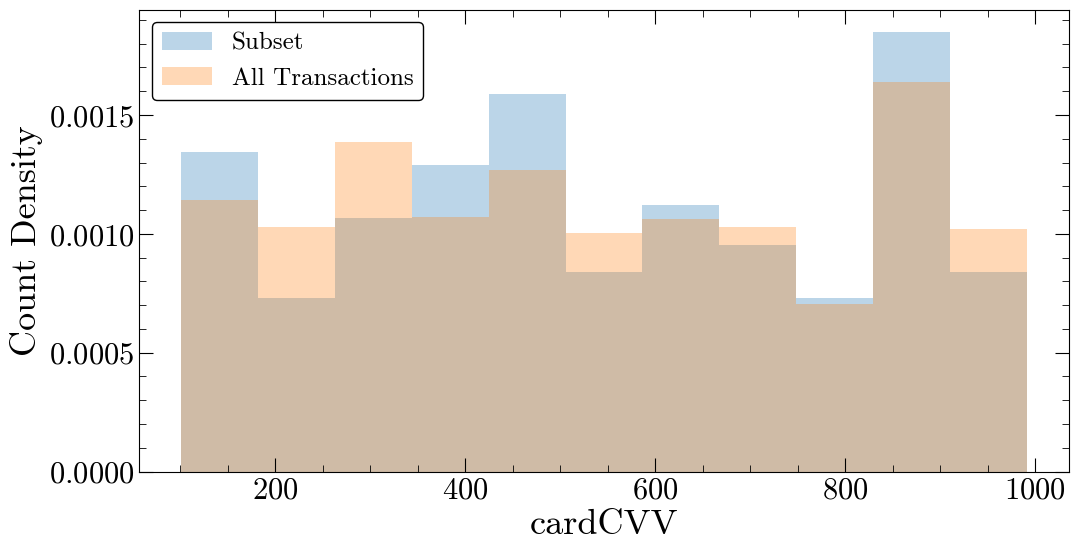

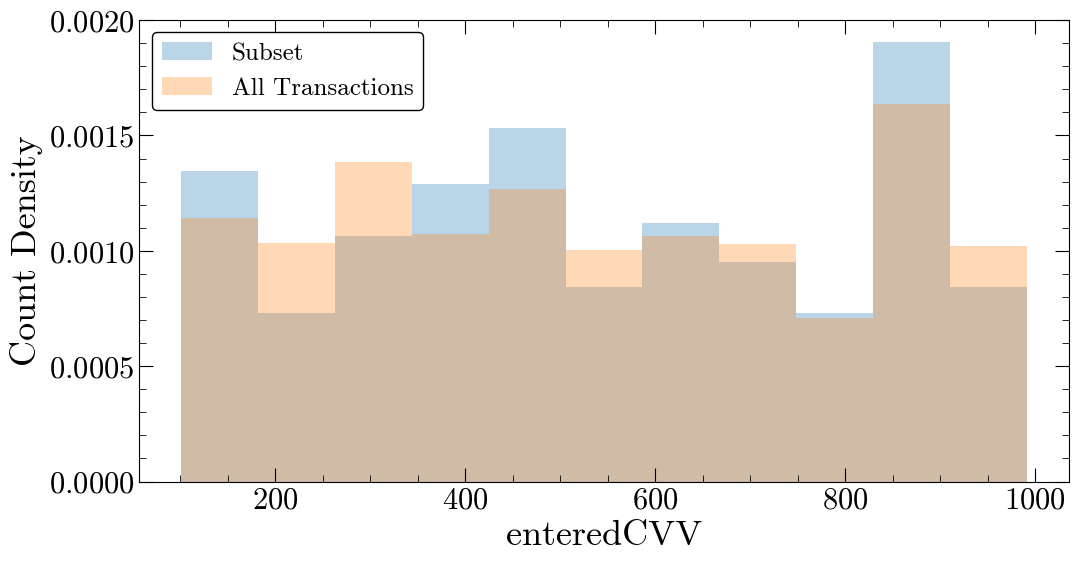

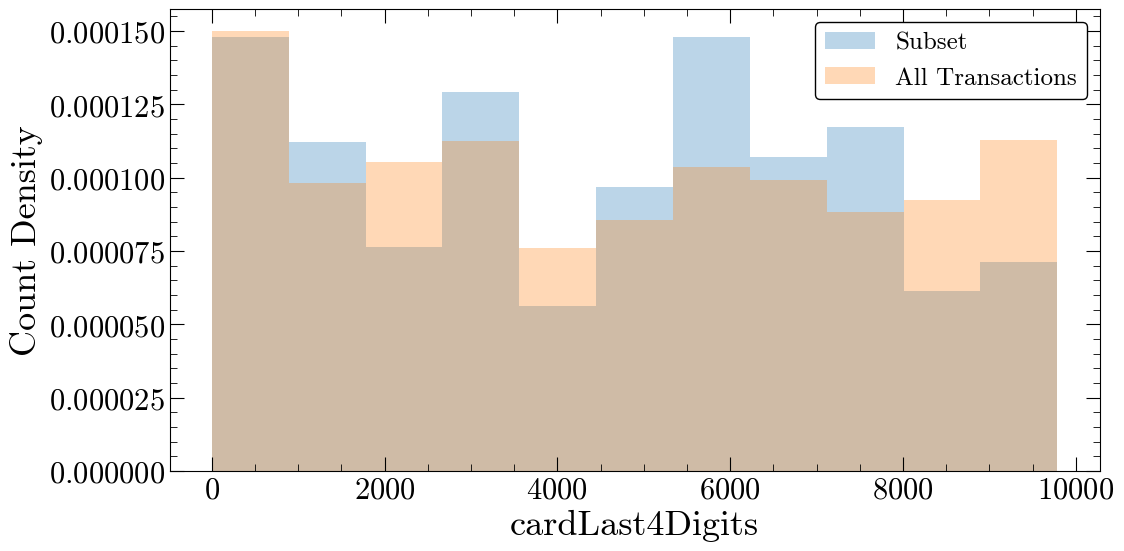

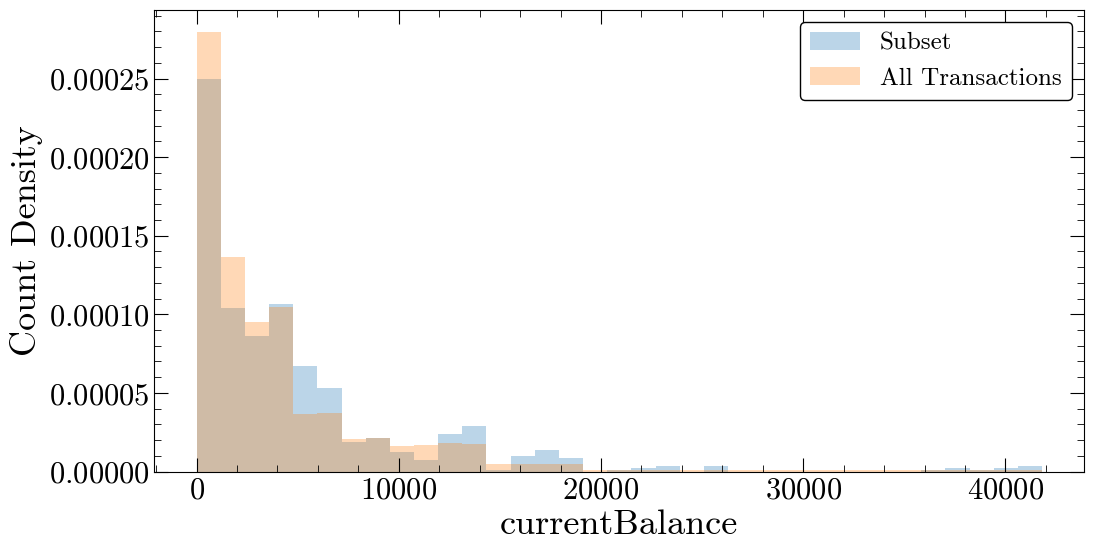

In [39]:
#compare distribution of numerical fields for multi-swipe transactions to all transactions
for col in numerical_cols:
    plot_against_all_transactions_numerical(all_multiswipes,col)

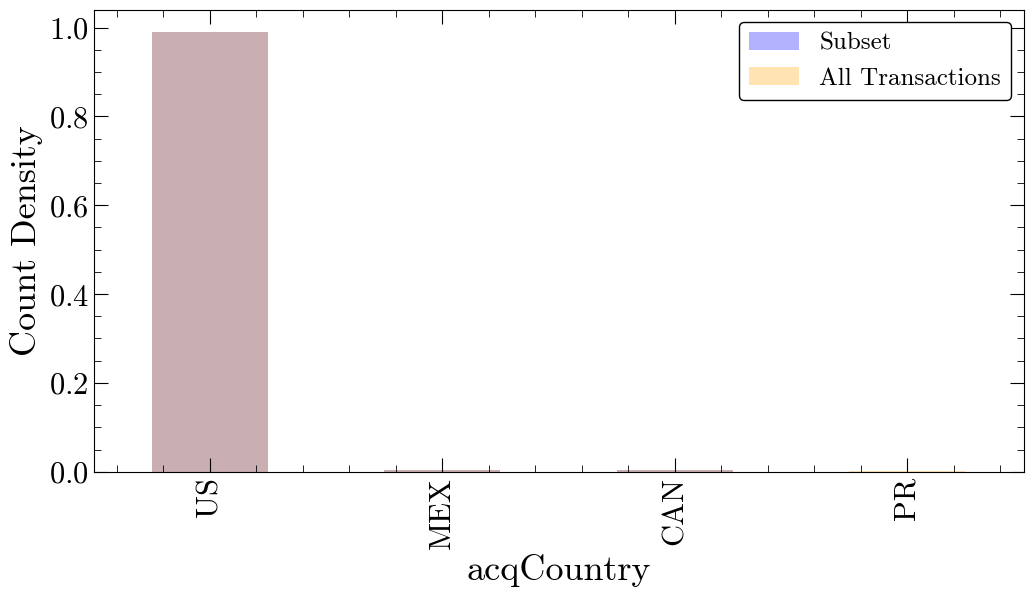

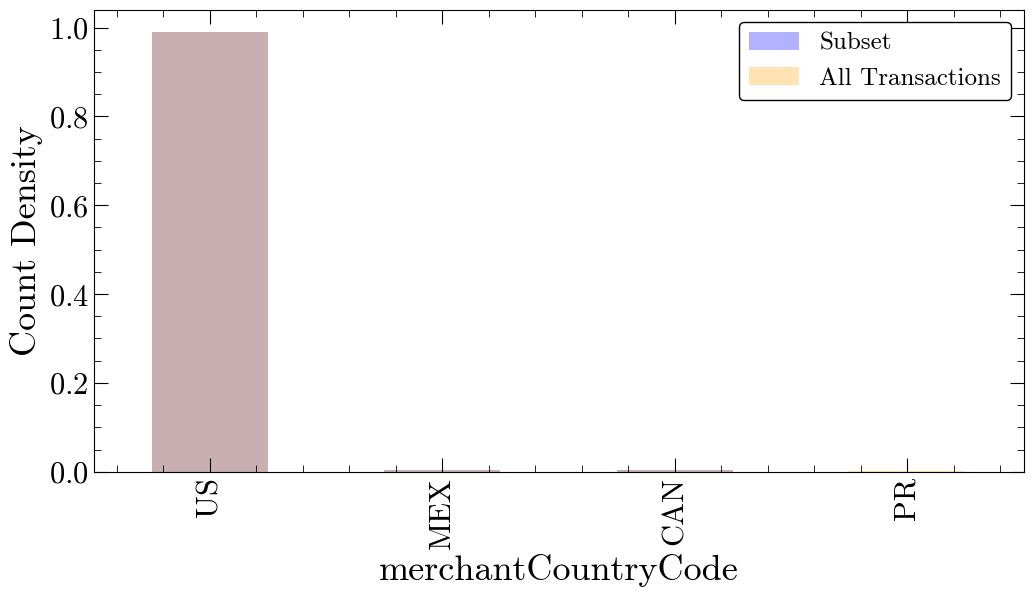

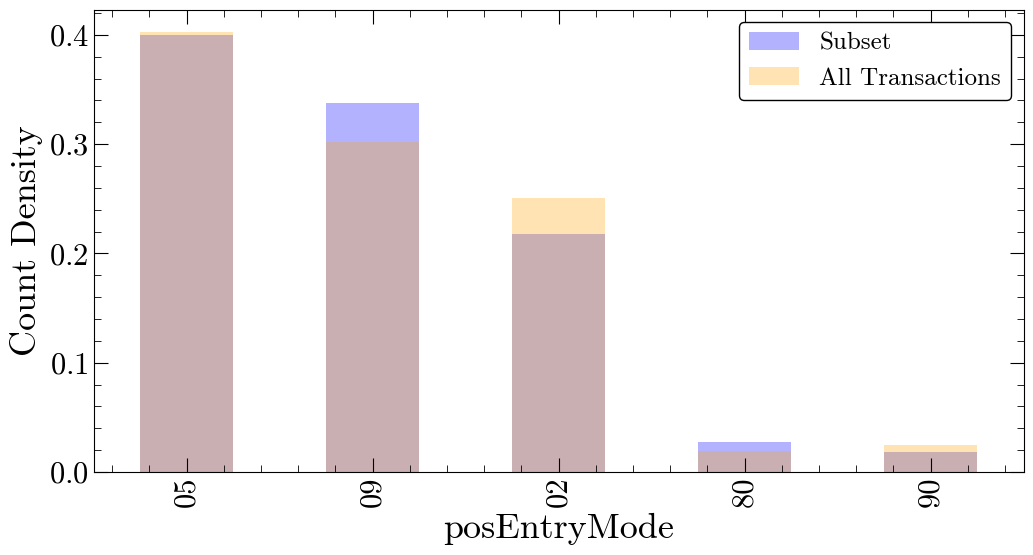

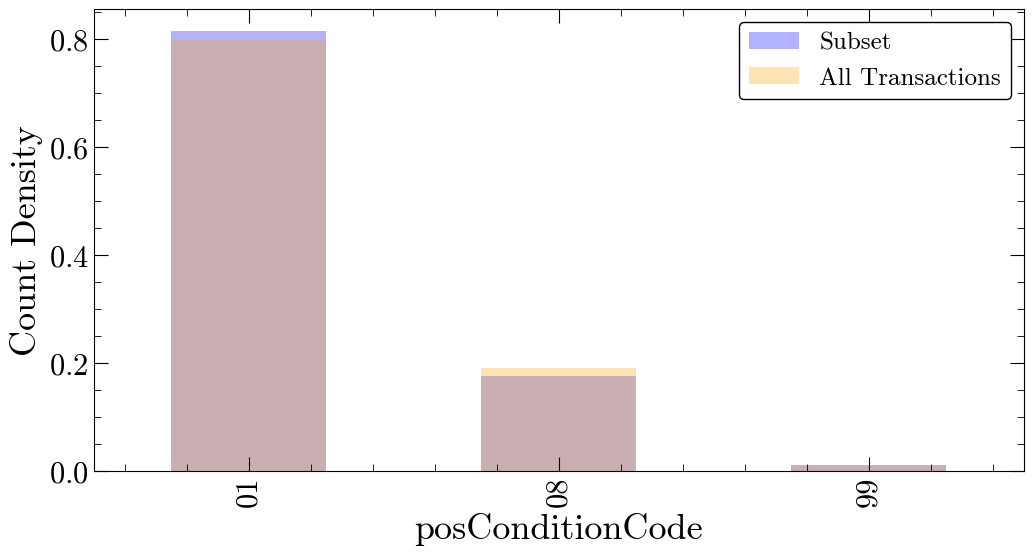

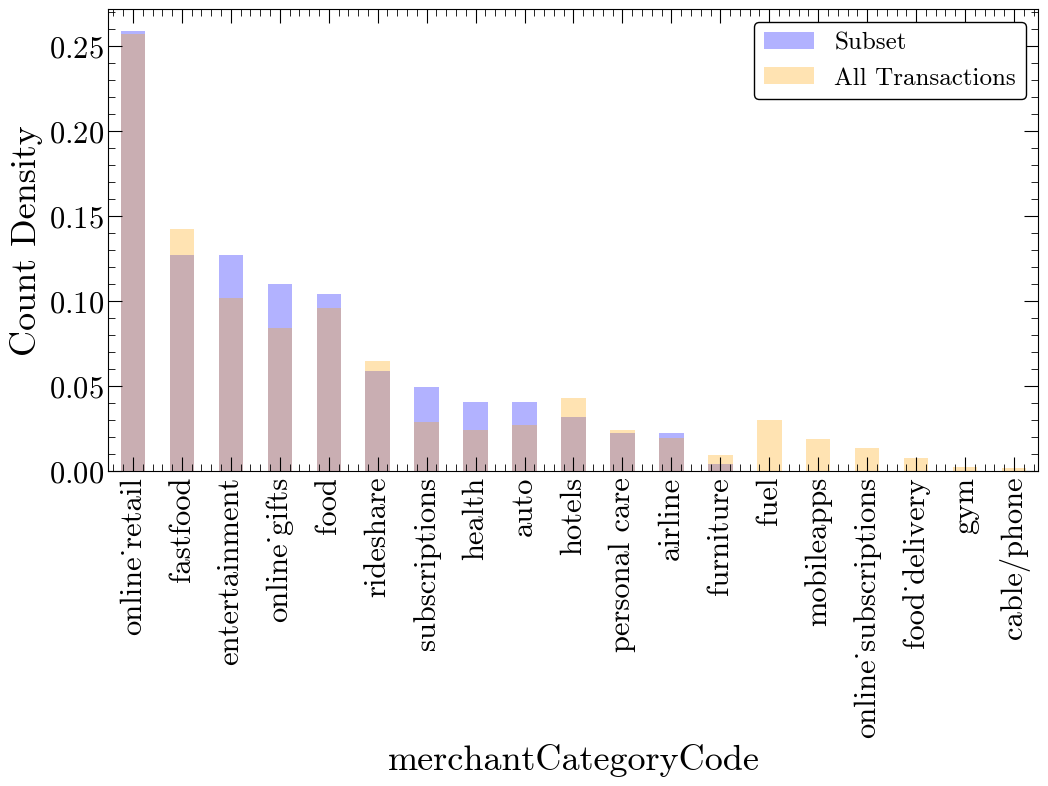

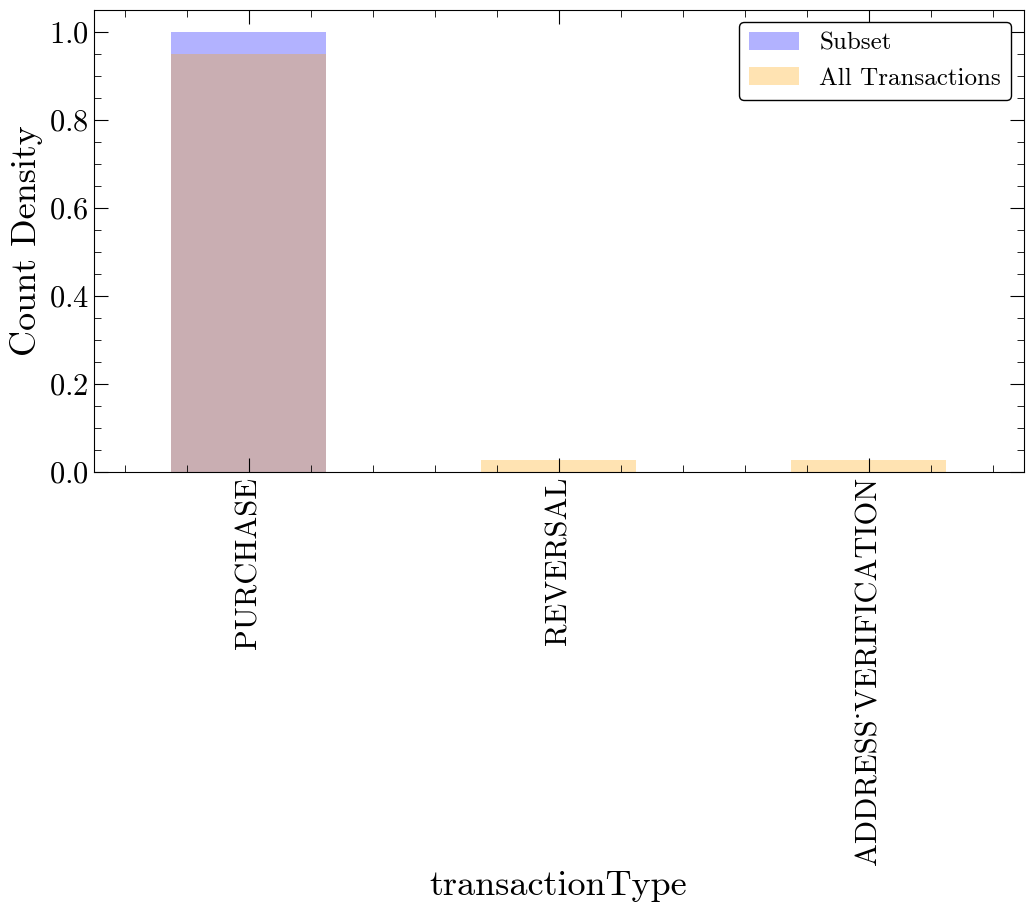

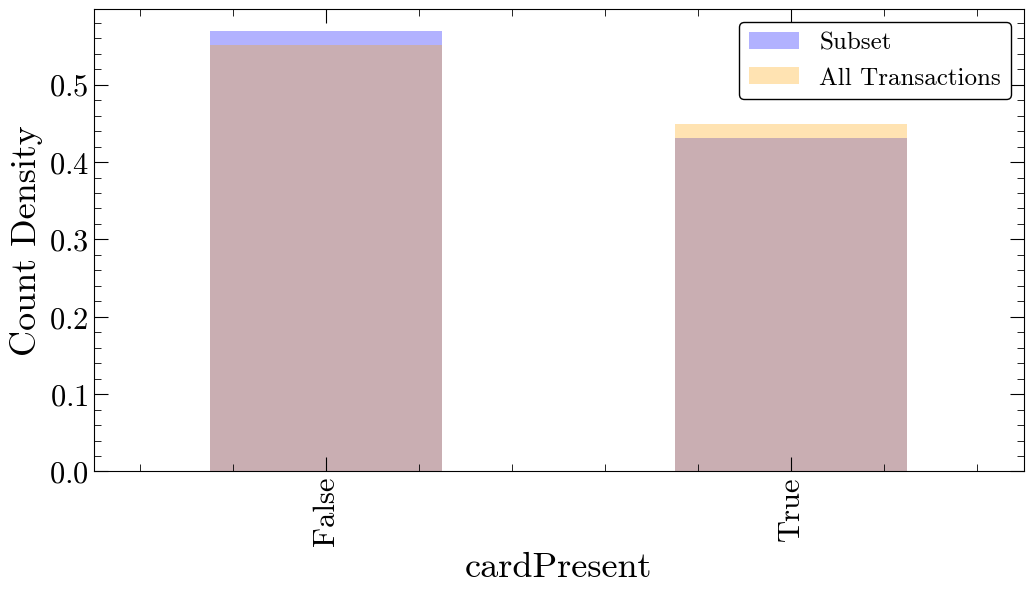

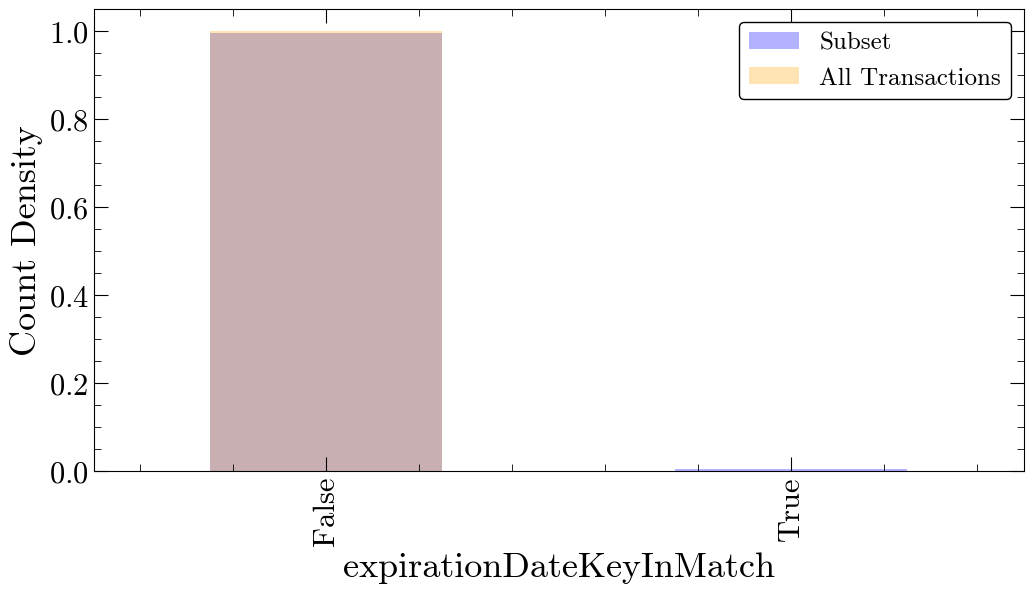

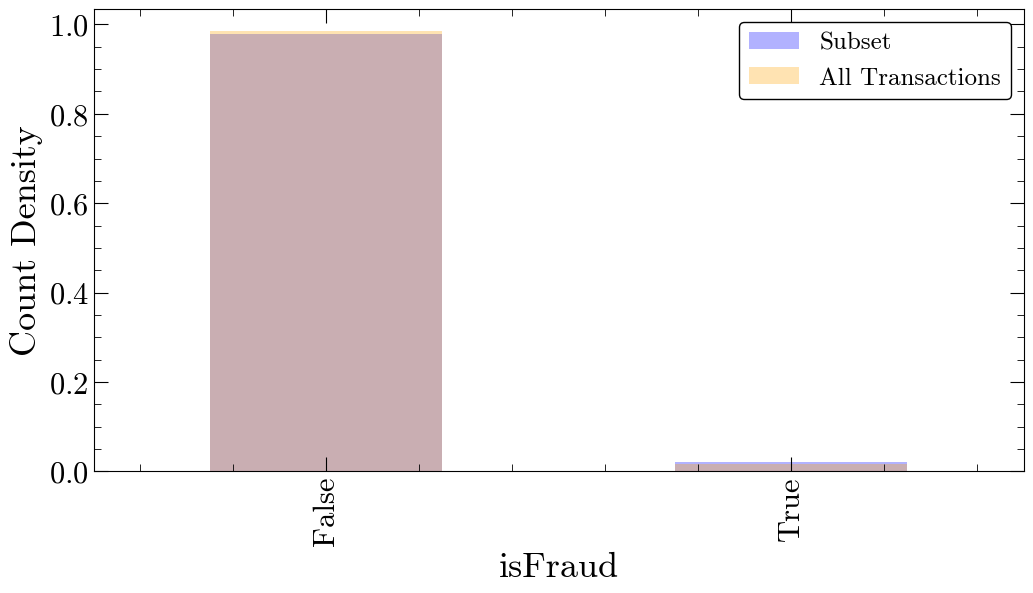

In [40]:
#compare distribution of categorical fields for multi-swipe transactions to all transactions
for col in categorical_cols:
    plot_against_all_transactions_categorical(all_multiswipes,col)

#note, there are too many unique merchant names to include them in this plot

### Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.
- **a)** Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
- **b)** Provide an estimate of performance using an appropriate sample, and show your work.
- **c)** Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)


**Answer to a), b), and c)**
- Much of this context is mixed together in the following sections

**Reformat the Data to be useful for machine learning**

The first step is to clean up the transactions DataFrame, and put it in a format that is useful for machine learning and deep learning. I will re-scale all numerical columns by (column/max(column)) so each column does not have disproportionate weight in the training process. I will use one-hot-encoding to convert all categorical variables into Boolean (0,1) variables. Column by column, here is how I am going to clean up the DataFrame and build useful features:
- accountNumber and customerId
    - The credit card number and customer id are redundant, so I need only consider one column. These columns are unique identifiers that are not immediately useful in identifying fraud, and their inclusion in training data could lead to overfitting. 
    - Instead, I can use these in feature engineering to build other useful metrics such as total number transactions and sum of all transactions by that customer over the whole time period of the data. Then, re-scale these numerical columns.
- creditLimit, availableMoney, transactionAmount, currentBalance
    - Re-scale numerical column
- transactionDateTime, currentExpDate, accountOpenDate, dateOfLastAddressChange
    - These DateTime columns are not immediately useful in identifying fraud, but can be used in feature engineering.
    - transactionDateTime: Identify temporal patterns in spending by breaking this up into hour of the day, day of the week, month, and year. Can also turn into "time since last transaction" column. If I had more time, I would implement these features. For simplicity, I will only consider the features in the following bullets.
    - transactionDateTime and currentExpDate can be combined into "time until card expires" column since transactions closer to the card expiration date may be more likely to be fraudulent (expired, less than 1 month, less than 1 year, greater than 1 year)
    - transactionDateTime and accountOpenDate can be combined into "time since account opened" column since older accounts may be more likely to have had their information leaked and thus may be more likely to experience fraud (less than 1 month, less than 1 year, greater than 1 year)
    - transactionDateTime and dateOfLastAddressChange can be combined into "time since last address change" since frequent changes in address may be suspicious and indicate fraud (less than 1 month, less than 1 year, greater than 1 year)
- merchantName
    - This is a very messy column with inconsistent formatting that will need to be addressed in order for the information to be useful in modeling. In particular, I will break this into multiple columns by:
        - separating the merchant name from the store number (ex. Walgreens \#572363 -> Walgreens, store_number=True=1)
        - flagging if the merchant is a website (ex. amazon.com -> Amazon, website=True=1)
    - Then, check merchant names and categorize merchants by proportion of fraud out of all transactions. Turn into nameFP00,nameFP0001,nameFP0103, nameFP0305, and nameFP05 flags for names with fraud proportions FP=0, 0<FP<0.01, 0.01<FP<0.03,0.03<FP<0.05, and FP>0.05.
    -  Then the categorical columns need to be converted using one-hot-encoding
- acqCountry, merchantCountryCode, posEntryMode, posConditionCode, transactionType
    - There are missing values, so convert all np.NaNs to their own missing category. Then the categorical column needs to be converted using one-hot-encoding.
- merchantCategoryCode
    - The categorical column need to be converted using one-hot-encoding.
- cardCVV and enteredCVV
    - The CVV is an identifier that is not immediately useful in identifying fraud, and its inclusion in training data could lead to overfitting. For fraud, the relevant quantity should be whether the cardCVV==enteredCVV not the actual number of the CVV, so I will combine these two columns and turn them into a Boolean match=1 or no_match=0.
- cardLast4Digits
    - The data formatting is inconsistent, with some entries not having 4 digits. Either this column has inconsistencies due to missing 0s or inconsistencies due to user error when entering the number. I am going to assume this value is automatically recorded and that the inconsistencies are just due to missing 0s. In this case, the Last4Digits is also an identifier which is not immediately useful in identifying fraud. I am also assuming that each account has exactly 1 credit card, in which case this parameter is redundant with the account number. So I remove this column for modeling.
- echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises,recurringAuthInd
    - This column is empty and will be removed for modeling.
- cardPresent, expirationDateKeyInMatch
    - This Boolean column will be converted from True/False to 1/0
- isFraud
    - This Boolean column will be converted from True/False to 1/0. There are far fewer fraudulent transactions than legitimate transactions but I think there are not so few as to necessitate anomaly detection methods. So I will implement techniques for imbalanced data sets in my modeling. If necessary, I will switch to anomaly detection techniques.
- Other features I would add if I had time, I will only add these if my model is struggling to meet my goals
    - reversed purchase flag for purchase corresponding to reversed transaction
    - multi-swipe flag


In [106]:
#make a copy of the transactions DataFrame
training = transactions.copy()

In [107]:
#drop columns that we will not use
training = training.drop(columns=['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises',
                                  'recurringAuthInd','cardLast4Digits'])


In [108]:
#add column for number of transactions associated with each account number
training['numberTransactions'] = training.groupby('accountNumber')['accountNumber'].transform('count')
#add column for sum of transactions associated with each account number
training['sumTransactions'] = training.groupby('accountNumber')['transactionAmount'].transform('sum')
#drop columns that we will not use again
training = training.drop(columns=['accountNumber','customerId'])

In [109]:
#rescale numerical columns
rescale_cols=['creditLimit','availableMoney','transactionAmount','currentBalance','numberTransactions',
              'sumTransactions']
for col in rescale_cols:
    training[col]=training[col]/max(training[col])
    
#current balance can be negative but max(currentBalance)=max(np.abs(currentBalance))

In [110]:
#feature engineer date columns

#time until card expires
timeToExpDate=(training['currentExpDate']-training['transactionDateTime']).dt.days #difference in days
training['timeToExpDateExpired'] = timeToExpDate <= 0 #days
training['timeToExpDate1mon'] = (timeToExpDate <= 30) & (timeToExpDate >0) #days
training['timeToExpDate1yr'] = (timeToExpDate <= 365) & (timeToExpDate >30) #days
training['timeToExpDateGtr1yr'] = timeToExpDate > 365 #days

#time since account opened
timeSinceOpen=(training['transactionDateTime']-training['accountOpenDate']).dt.days #difference in days
training['timeSinceOpen1mon'] = (timeSinceOpen <= 30) #days
training['timeSinceOpen1yr'] = (timeSinceOpen <= 365) & (timeSinceOpen >30) #days
training['timeSinceOpenGtr1yr'] = timeSinceOpen > 365 #days

#time since last address change
timeSinceAddChange=(training['transactionDateTime']-training['dateOfLastAddressChange']).dt.days #difference in days
training['timeSinceAddChange1mon'] = (timeSinceAddChange <= 30) #days
training['timeSinceAddChange1yr'] = (timeSinceAddChange <= 365) & (timeSinceAddChange >30) #days
training['timeSinceAddChangeGtr1yr'] = timeSinceAddChange > 365 #days

#drop columns that we will not use again
training = training.drop(columns=['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'])

In [160]:
#make column comparing true to entered CVV
training['correctCVV'] = training['cardCVV'] == training['enteredCVV']
#drop columns that we will not use again
training = training.drop(columns=['cardCVV','enteredCVV'])

In [114]:
# turn all Boolean columns into numeric Boolean columns
boolean_cols=['cardPresent','expirationDateKeyInMatch','isFraud','timeToExpDateExpired','timeToExpDate1mon',
              'timeToExpDate1yr', 'timeToExpDateGtr1yr','timeSinceOpen1mon', 'timeSinceOpen1yr',
              'timeSinceOpenGtr1yr','timeSinceAddChange1mon', 'timeSinceAddChange1yr','timeSinceAddChangeGtr1yr',
              'correctCVV']
for col in boolean_cols:
    training[col]=training[col].astype(int)


In [138]:
# reformatting the merchant column to be useful requires looping through the full DataFrame,
# which is very slow
# break the table into smaller data sets and use multiprocessing to make it faster
# if I had an even larger data set, I would switch to the super computer I have access to :)

#break up training set into sets of 5000
set_size=5000
num_id_sets=int(len(training)/set_size)+1    
training_subsets={}
#make a .csv for each set of ids
for i in tqdm(range(num_id_sets)):
    training_subsets[i]=training[set_size*i:set_size*i+set_size]
    #save
    training_subsets[i].to_csv('csv/set_'+str(i)+'.csv',index=False)
    

100%|█████████████████████████████████████████| 158/158 [00:05<00:00, 28.07it/s]


In [145]:
def merchant_column_reprocess(i):
    #reformat the merchant name column to be useful
    mechant_names=[]
    store_num=[]
    website=[]
    for j in range(len(training_subsets[i])):
        full_name=training_subsets[i]['merchantName'].to_list()[j]
        #capitalize all letters and remove spaces for consistent formatting
        full_name=full_name.upper().replace(' ','')

        has_store=False
        is_website=False

        #if has store number, separate from store name
        try:
            name, store=full_name.split('#')
            mechant_names.append(name)
            store_num.append(1)
            website.append(0)
            has_store=True
        except:
            pass

        #if is website, separate from store name
        try:
            name, com=full_name.split('.COM')
            mechant_names.append(name)
            store_num.append(0)
            website.append(1)
            is_website=True
        except:
            pass

        if has_store==False and is_website==False:
            mechant_names.append(full_name)
            store_num.append(0)
            website.append(0)

    training_subsets[i]['merchantName']=mechant_names
    training_subsets[i]['storeNum']=store_num
    training_subsets[i]['website']=website
    
    #save
    training_subsets[i].to_csv('csv/set_'+str(i)+'.csv',index=False)

In [147]:
#run for each subset
print(num_id_sets)
#set n_jobs=-2 to spawn n-1 CPU threads where n=total number CPUs available
result=Parallel(n_jobs=-2, verbose=11)(delayed(merchant_column_reprocess)(i) for i in range(num_id_sets))


158


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-2)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-2)]: Done   6 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-2)]: Done   9 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-2)]: Done  13 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-2)]: Done  14 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-2)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-2)]: Done 132 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 133 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 134 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 135 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-2)]: Done 136 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-2)]: Done 137 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-2)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-2)]: Done 139 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-2)]: Done 141 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 142 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 143 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 144 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 145 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 158 out of 158 | elapsed:  3.1min finished


In [150]:
#read back in subsets and re-combine
training_subsets={}
for i in tqdm(range(num_id_sets)):
    training_subsets[i]=pd.read_csv('csv/set_'+str(i)+'.csv')
    
#combine all the dataframes together
training=training_subsets[0].append(training_subsets[1])
for i in tqdm(range(num_id_sets-2)):
    training=training.append(training_subsets[i+2])
#reset the indices
indices=np.arange(0,len(training))
training.set_index(indices,inplace=True)
#save as a .csv
training.to_csv('csv/training.csv',index=False)


100%|████████████████████████████████████████| 158/158 [00:01<00:00, 130.86it/s]
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training_subsets[0].append(training_subsets[1])
  0%|                                                   | 0/156 [00:00<?, ?it/s]/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1x

/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
 61%|█████████████████████████▌                | 95/156 [00:01<00:01, 42.14it/s]/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is depre

/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
 80%|████████████████████████████████▊        | 125/156 [00:02<00:01, 25.45it/s]/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is depre

 97%|███████████████████████████████████████▉ | 152/156 [00:03<00:00, 21.00it/s]/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T/ipykernel_6306/4165363133.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training=training.append(training_subsets[i+2])
 99%|████████████████████████████████████████▋| 155/156 [00:04<00:00, 20.70it/s]/var/folders/ny/bjybyvhj6s9_2ms5cmld1xbc0000gn/T

In [154]:
#now this column is much more manageable
print(training['storeNum'].unique())
print(training['website'].unique())
print(training['merchantName'].unique())

[0 1]
[0 1]
['UBER' 'AMC' 'PLAYSTORE' 'TIMHORTONS' 'IN-N-OUT' 'KRISPYKREME'
 'SHAKESHACK' 'BURGERKING' 'FIVEGUYS' "AUNTIEANNE'S" 'GREENCOOK'
 'WASHINGTONREPAIR' 'EAZYTIRE' 'CONVENIENTAUTOSERVICES' 'SHELLAUTOBODY'
 'FASTAUTOSERVICES' 'STAPLES' 'CONVENIENTREPAIR' 'SHELLREPAIR'
 'EAZYREPAIR' 'FASTREPAIR' 'EAZYAUTOBODY' 'WASHINGTONTIRE' 'TARGET'
 'CONVENIENTTIRE' 'AMAZON' 'SHELLTIRE' 'MERCHANTSAUTOBODY' 'GAP'
 'FASTTIRE' 'SEARS' 'APPLE' 'MERCHANTSTIRE' 'RICKSAUTOBODY'
 'MERCHANTSAUTOSERVICES' 'CURVES' 'OLDNAVY' 'WASHINGTONAUTOBODY' 'EBAY'
 'DISCOUNT' 'ALIBABA' 'CVS' 'WALGREENS' 'WSC' 'UNIVERSEMASSAGE'
 'POWERLIFTING' '1STSANDWITCHBAR' 'NYSC' 'LYFT' 'PLANETFITNESS' 'GOLDSGYM'
 'BOSTONFRIES' 'SOUTHSTEAKHOUSE' '53RDBEAUTY' 'REGALCINEMAS' "JOHN'SCAFE"
 'ROCKWEIGHTS' 'DOWNTOWNBBQ' '34THPUB' 'EZPUTTPUTT' 'FRANKSSANDWITCHBAR'
 '53RDSPA' 'WESTENDBEAUTY' 'FRANKSPUB' "RAY'SFRIES" 'UPTOWNDINER'
 'UPTOWNBBQ' '53RDMASSAGE' '1STDELI' 'DOWNTOWNDINER' 'DINOSAURRESTAURANT'
 'TEXASGAS' '34THBBQ' 'NORTHTOWNS

In [182]:
#turn merchant names into categorical variable given by fraud proportion for transactions with that merchant
fraud_prop_df={}
for name in training['merchantName'].unique():
    all_data=training.query('merchantName==@name')
    fraud_num=len(all_data.query('isFraud==1'))
    fraud_prop=fraud_num/len(all_data)
    if fraud_prop==0:
        val='nameFP00'
    if fraud_prop>0 and fraud_prop<=0.01:
        val='nameFP0001'
    if fraud_prop>0.01 and fraud_prop<=0.03:
        val='nameFP0103'
    if fraud_prop>0.03 and fraud_prop<=0.05:
        val='nameFP0305'
    if fraud_prop>0.05:
        val='nameFP05'
    fraud_prop_df[name]=val
    

In [184]:
#replace each name by the fraud proportion category
for name in training['merchantName'].unique():
    fraud_cat=fraud_prop_df[name]
    training['merchantName']=training['merchantName'].replace(name, fraud_cat)

In [186]:
#save version of training before one-hot-encoding, which adds many many columns
#this will make life easier if I decide not to use some of the categorical columns
training.to_csv('csv/training_no_one_hot.csv',index=False)

In [188]:
# for categorical columns with missing values, replace np.NaNs with "None"
# Note, only categorical columns have missing values, so I can just do this across the whole DataFrame
training=training.fillna('None')

#use one hot encoding to turn categorical variables into numeric Boolean columns
training = pd.get_dummies(training, dtype=float)

In [190]:
#save final version of training data
training.to_csv('csv/training_with_one_hot.csv',index=False)

In [191]:
display(training)

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,numberTransactions,sumTransactions,timeToExpDateExpired,timeToExpDate1mon,timeToExpDate1yr,timeToExpDateGtr1yr,timeSinceOpen1mon,timeSinceOpen1yr,timeSinceOpenGtr1yr,timeSinceAddChange1mon,timeSinceAddChange1yr,timeSinceAddChangeGtr1yr,storeNum,website,correctCVV,merchantName_nameFP00,merchantName_nameFP0001,merchantName_nameFP0103,merchantName_nameFP0305,merchantName_nameFP05,acqCountry_CAN,acqCountry_MEX,acqCountry_None,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_None,merchantCountryCode_PR,merchantCountryCode_US,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0,posEntryMode_None,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,posConditionCode_None,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_None,transactionType_PURCHASE,transactionType_REVERSAL
0,0.1,0.100000,0.048992,0.000000,0,0,0,0.000122,0.000039,0,0,0,1,0,0,1,0,0,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.1,0.100000,0.037041,0.000000,1,0,0,0.000122,0.000039,0,0,0,1,0,0,1,0,0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.1,0.100000,0.003714,0.000000,0,0,0,0.000122,0.000039,0,0,0,1,0,0,1,0,0,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.1,0.100000,0.003714,0.000000,0,0,0,0.000122,0.000039,0,0,0,1,0,0,1,0,0,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.1,0.100000,0.035386,0.000000,1,0,0,0.000335,0.000248,0,0,0,1,0,1,0,0,1,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,1.0,0.978099,0.059616,0.023054,0,0,0,0.003349,0.002517,0,0,0,1,0,0,1,0,0,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
786359,1.0,0.975701,0.009391,0.025579,0,0,0,0.003349,0.002517,0,0,0,1,0,0,1,0,0,1,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
786360,1.0,0.975323,0.024573,0.025976,0,0,0,0.003349,0.002517,0,0,0,1,0,0,1,0,0,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [192]:
#get basic info for the training table
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 70 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   creditLimit                                786363 non-null  float64
 1   availableMoney                             786363 non-null  float64
 2   transactionAmount                          786363 non-null  float64
 3   currentBalance                             786363 non-null  float64
 4   cardPresent                                786363 non-null  int64  
 5   expirationDateKeyInMatch                   786363 non-null  int64  
 6   isFraud                                    786363 non-null  int64  
 7   numberTransactions                         786363 non-null  float64
 8   sumTransactions                            786363 non-null  float64
 9   timeToExpDateExpired                       786363 non-null  int64  
 10  timeToEx

In [7]:
#read back in tables if necessary
training=pd.read_csv('csv/training_with_one_hot.csv')


**Divide into training and test data set**
- I choose a 80-20 split to maximize training data while still having enough test data.

In [8]:
x = training.drop(columns=['isFraud'])
y = training['isFraud']

# Split the dataset into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(629090, 69) (157273, 69) (629090,) (157273,)


**Mitigate Imbalanced Data Set**
- There are far fewer cases of fraud than of legitimate transactions, so we must implement techniques to mitigate this.
    - I will choose to oversample the minority class (isFraud=True) using SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class using a nearest neighbor analysis. 
        - Note, if you oversample to deal with imbalanced data then you must do this AFTER dividing into training and testing. The reverse order can result in data leakage.
    - Tree-based methods like Random Forest and XGBoost can perform better than other methods when there is an imbalanced data set, so I will prioritize these methods first. SVM can also perform well in these cases, but is far more computationally expensive than tree-based methods for large training sets and so I will implement this later if necessary. I will test these methods BOTH with the resampled data created using SMOTE and with the original data but re-weighting the class priorities to prioritize the minority class.
    - When evaluating my models, I will prioritize precision, recall, and F1-score over accuracy since accuracy can be misleading in imbalanced data sets.


In [4]:
smote = SMOTE(sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print(x_train_resampled.shape, y_train_resampled.shape)

(1238320, 69) (1238320,)


**Start with Sci-Kit learn machine learning methods for imbalanced data sets**
- I usually start with classic machine learning methods since I find them to be more interpretable than deep learning methods.
- As stated earlier, I will start with techniques for imbalanced data sets rather than anomaly detection. If these techniques do not perform well enough, then I will use anomaly detection. If that still does not perform well enough, then I will try deep learning also.

**Notes on Different Sci-Kit Learn Classification Methods**

My notes I keep on hand about various methods:

https://scikit-learn.org/dev/api/sklearn.ensemble.html
- Logistic Regression:
    - Description: A linear model used for binary classification tasks.
     - Pros: Simple, interpretable, and quick to train. Works well when features and the target variable have a linear relationship.
    - Cons: Assumes a linear decision boundary, which might not capture complex relationships.
    - Usage: Good baseline model for binary classification.
    - https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

- Random Forest Classifier:
    - Description: An ensemble method that builds multiple decision trees on different subsets of the data and aggregates their results.
    - Pros: Captures non-linear relationships, robust to overfitting, and handles both categorical and continuous features well.
    - Cons: Can be slower to train compared to simpler models.
    - Usage: Excellent for handling structured/tabular data and works well for binary classification tasks.
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

- Gradient Boosting Classifier:
    - Description: A boosting algorithm that builds models sequentially, correcting errors from previous models.
    - Pros: High accuracy, handles non-linear relationships well, and generally outperforms Random Forest with fewer trees.
    - Cons: More sensitive to hyperparameters and longer training times.
    - Usage: Ideal for complex, structured data with lots of features.
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)

- Support Vector Machine (SVM):
    - Description: A classifier that tries to find the hyperplane that best separates the classes.
    - Pros: Good for small datasets and handles non-linear boundaries well with the use of kernels.
    - Cons: Sensitive to feature scaling and can be computationally expensive for large datasets.
    - Usage: Works well when the relationship between features and the target is complex.
    - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

from sklearn.svm import SVC

model = SVC(kernel='rbf')

- XGBoost (External library based on scikit-learn API):
    - Description: A highly efficient implementation of gradient boosting.
    - Pros: Excellent performance for classification tasks, fast training time, and handles missing data well.
    - Cons: Tuning hyperparameters can be challenging.
    - Usage: Often provides the best performance for binary classification tasks with structured/tabular data.

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100)

**Notes on different classification model performance metrics**

- Accuracy
    - The percentage of correctly classified instances out of all instances.
    - $=\frac{TP+TN}{TP+TN+FP+FN}$
    - Useful when the dataset is balanced (i.e., when the classes are equally represented). However, it can be misleading for imbalanced datasets.
    - In a binary classification task where the positive class is only 1% of the data, predicting everything as the negative class could still result in a 99% accuracy, which hides the model's inability to detect positives.
- Precision
    - The proportion of correctly predicted positive instances out of all instances predicted as positive.
    - $=\frac{TP}{TP+FP}$
    - Precision is important when false positives are more costly than false negatives. It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
    - In criminal prosecutions, a high number of false positives might result in injust outcomes for innocent people, so you want a model with high precision.
- Recall
    - The proportion of actual positive instances that were correctly classified.
    - $=\frac{TP}{TP+FN}$
    - Recall is critical when missing positive cases is costly. It answers the question: "Of all the actual positive instances, how many were correctly predicted?"
    - In medical diagnostics, missing a positive case (false negative) can be dangerous, so high recall is often more important than precision.
- Specificity
    - The proportion of actual negative instances that were correctly classified.
    - $=\frac{TN}{TN+FP}$
    - Specificity is important when false positives are costly. It answers the question: "Of all the actual negative instances, how many were correctly predicted?"
    - In a legal system, you might prioritize avoiding false positives (incorrectly identifying someone as guilty), so high specificity is desirable.
- F1 Score
    - The harmonic mean of precision and recall, providing a single metric that balances both precision and recall.
    - $=2\times\frac{Precision\times Recall}{Precision+Recall}$
    - The F1 score is useful when you need to balance both precision and recall, especially for imbalanced datasets. If you have a tradeoff between precision and recall, the F1 score helps you find the best balance.
    -  In spam detection, you might want a balance between precision (reducing false positives) and recall (catching most spam messages), so the F1 score can be a helpful metric.
- ROC Curve (Receiver Operating Characteristic Curve)
    - A graphical plot that shows the tradeoff between true positive rate (recall) and false positive rate across different threshold values.
    - False positive rate$=\frac{FP}{FP+TN}$
    - The ROC curve is useful for evaluating models where you care about how well the model distinguishes between the positive and negative classes, independent of any threshold. It’s especially useful in imbalanced datasets.
    - You can visualize the performance of different models and select one that maximizes true positives while minimizing false positives.
- AUC (Area Under the Curve)
    - The area under the ROC curve. A value of 1.0 represents a perfect classifier, while a value of 0.5 represents a random classifier.
    - The AUC score gives you a single number to compare the overall performance of different models, especially when the dataset is imbalanced.
- Precision-Recall Curve
    - A plot that shows the tradeoff between precision and recall across different thresholds.
    - When dealing with imbalanced datasets (where the positive class is rare), a precision-recall curve can be more informative than an ROC curve. It helps visualize the balance between precision and recall for different threshold settings.
- Confusion Matrix
    - A matrix that shows the counts of true positives, true negatives, false positives, and false negatives. It provides a complete picture of the classification performance.
    - The confusion matrix is useful to understand how well a classifier is performing in terms of different kinds of errors (false positives and false negatives).
    - If a model has many false negatives, you might focus on improving recall.

Choosing the Right Metric
- Balanced Datasets: If the positive and negative classes are roughly equal, accuracy is a reasonable metric.
- Imbalanced Datasets: If one class is much rarer than the other, use precision, recall, or the F1 score, depending on whether false positives or false negatives are more costly.
- Threshold-independent Evaluation: Use the ROC curve and AUC to assess the model’s performance across different thresholds.

**Best metrics for this case**
- Since this is an imbalanced data set we want to prioritize precision, recall, and F1 score. High precision minimizes false positives which would result in unnecessary fraud investigations. High recall minimizes false negatives which would result in missing cases of fraud. There is typically a trade-off between precision and recall where increasing one decreases the other. I will prioritize recall over precision a bit because usually when a transaction is flagged as fraudulent, credit card companies can just send a confirmation to the customer's phone or email. Sending this confirmation is not too costly to Capital One and is not too much of a nuisance for customers trying to make legitimate purchases. On the other side, if a case of fraud is missed, a customer will be far more inconvenienced and dealing with the case will become more costly for Capital One. But, I still want a balance between precision and recall to not have too many legitimate purchases flagged as fraud. 

**Test Different Sci-Kit Learn Classification Methods**

- In this case, I will test the RandomForest and XGBClassifier. Tree based methods often work well with imbalanced data, and this way I test one bagging and one boosting method. Generally, I find that XGBoost performs best out of the basic Sci-kit Learn classification methods.
- I will start with the default parameters, then perform a random search of the hyperparameters to see if they improve performance.

In [9]:
def performance_metrics(model,XTEST,YTEST,plot=True):
    # Predict on the test data
    y_pred = model.predict(XTEST)

    # Calculate and print performance metrics
    #Accuracy
    acc=sklearn.metrics.accuracy_score(YTEST, y_pred)
    print(r'Accuracy: {:2.3f} '.format(acc))
    #Precision
    prec=sklearn.metrics.precision_score(YTEST, y_pred)
    print(r'Precision: {:2.3f} '.format(prec))
    #Recall
    rec=sklearn.metrics.recall_score(YTEST, y_pred)
    print(r'Recall: {:2.3f} '.format(rec))
    #F1
    f1=sklearn.metrics.f1_score(YTEST, y_pred)
    print(r'F1 Score: {:2.3f} '.format(f1))
    
    # Generate the confusion matrix
    cm = confusion_matrix(YTEST, y_pred)
    TN=cm[0][0]
    FP=cm[0][1]
    FN=cm[1][0]
    TP=cm[1][1]
    
    #Specificity
    spec=TN/(TN+FP)
    print(r'Specificity: {:2.3f} '.format(spec))
    
    if plot:
        # Display the confusion matrix
        ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Accuracy: 0.985 
Precision: 0.735 
Recall: 0.085 
F1 Score: 0.152 
Specificity: 1.000 


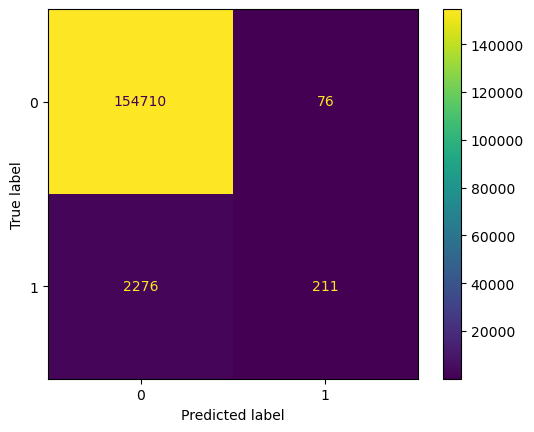

In [6]:
#initialize the model
rf_model = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 10}) #give minority class more weight

# Train the model on the training data
rf_model.fit(x_train, y_train)

#show performance
performance_metrics(rf_model,x_test,y_test)

Accuracy: 0.956 
Precision: 0.105 
Recall: 0.238 
F1 Score: 0.146 
Specificity: 0.968 


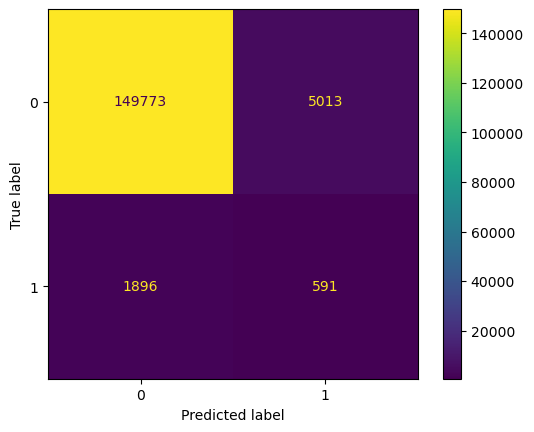

In [7]:
#initialize the model
rf_model_resampled = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf_model_resampled.fit(x_train_resampled, y_train_resampled)

#show performance
performance_metrics(rf_model_resampled,x_test,y_test)

Accuracy: 0.957 
Precision: 0.104 
Recall: 0.227 
F1 Score: 0.143 
Specificity: 0.969 


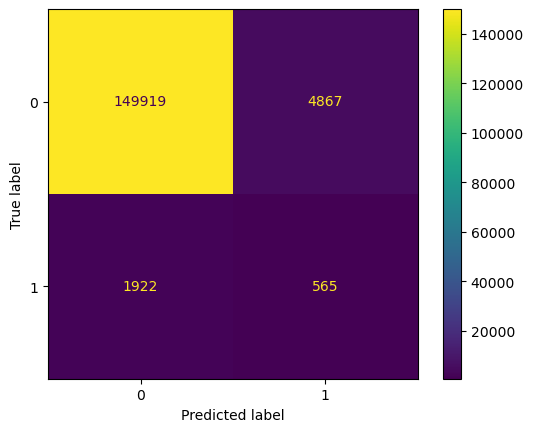

In [8]:
#initialize the model
rf_model_cw_resamp = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 10}) #give minority class more weight

# Train the model on the training data
rf_model_cw_resamp.fit(x_train_resampled, y_train_resampled)

#show performance
performance_metrics(rf_model_cw_resamp,x_test,y_test)

Accuracy: 0.975 
Precision: 0.234 
Recall: 0.262 
F1 Score: 0.247 
Specificity: 0.986 


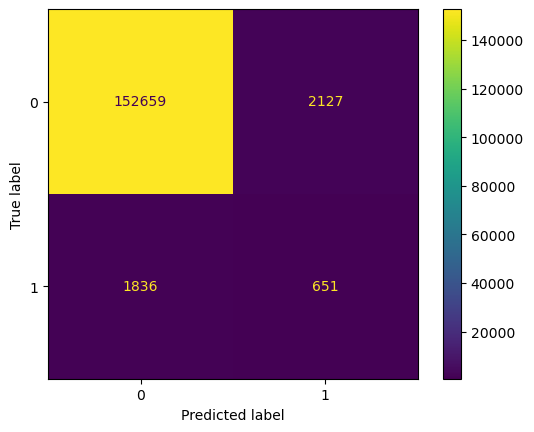

In [9]:
#initialize the model
xgb_model = XGBClassifier(n_estimators=100,scale_pos_weight=10) #give minority class more weight

# Train the model on the training data
xgb_model.fit(x_train, y_train)

#show performance
performance_metrics(xgb_model,x_test,y_test)

Accuracy: 0.885 
Precision: 0.070 
Recall: 0.509 
F1 Score: 0.123 
Specificity: 0.891 


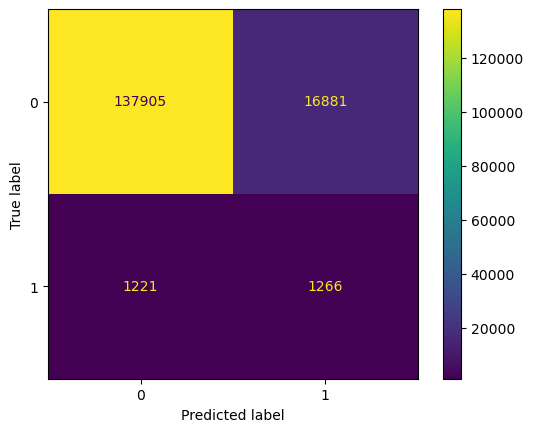

In [10]:
#initialize the model
xgb_model_resampled = XGBClassifier(n_estimators=100)

# Train the model on the training data
xgb_model_resampled.fit(x_train_resampled, y_train_resampled)

#show performance
performance_metrics(xgb_model_resampled,x_test,y_test)

**Findings from initial test**
- None of these initial models are performing particularly well in my opinion, meaning it is worthwhile to further investigate possible improvements. The XGBoost method with class weights is the most promising of the models because it shows the best balance between precision and recall. So, I will see how far this model can go with tuning hyper-parameters and testing different features in the training set.

**Adjust class weights**
- I first see how adjusting the class weights affects the balance between precision and recall. I find that lower weight yields higher precision (lower recall) while higher weights yield higher recall (lower precision). I choose a weight of 10 since this has the highest F1-score for which recall dominates over precision.

In [11]:
weights=[1,5,6,7,8,9,10,11,12,13,20]
for w in weights:
    print(w)
    #initialize the model
    xgb_model_w = XGBClassifier(n_estimators=100,scale_pos_weight=w) #give minority class more weight

    # Train the model on the training data
    xgb_model_w.fit(x_train, y_train)

    #show performance
    performance_metrics(xgb_model_w,x_test,y_test,plot=False)

1
Accuracy: 0.985 
Precision: 0.817 
Recall: 0.091 
F1 Score: 0.164 
Specificity: 1.000 
5
Accuracy: 0.983 
Precision: 0.428 
Recall: 0.173 
F1 Score: 0.246 
Specificity: 0.996 
6
Accuracy: 0.982 
Precision: 0.375 
Recall: 0.191 
F1 Score: 0.253 
Specificity: 0.995 
7
Accuracy: 0.981 
Precision: 0.333 
Recall: 0.208 
F1 Score: 0.256 
Specificity: 0.993 
8
Accuracy: 0.979 
Precision: 0.301 
Recall: 0.224 
F1 Score: 0.256 
Specificity: 0.992 
9
Accuracy: 0.977 
Precision: 0.264 
Recall: 0.246 
F1 Score: 0.255 
Specificity: 0.989 
10
Accuracy: 0.975 
Precision: 0.234 
Recall: 0.262 
F1 Score: 0.247 
Specificity: 0.986 
11
Accuracy: 0.972 
Precision: 0.212 
Recall: 0.276 
F1 Score: 0.240 
Specificity: 0.984 
12
Accuracy: 0.969 
Precision: 0.189 
Recall: 0.298 
F1 Score: 0.231 
Specificity: 0.979 
13
Accuracy: 0.966 
Precision: 0.179 
Recall: 0.314 
F1 Score: 0.229 
Specificity: 0.977 
20
Accuracy: 0.941 
Precision: 0.117 
Recall: 0.417 
F1 Score: 0.182 
Specificity: 0.949 


**Test dropping features**
- When performance is poor, it might indicate something wrong with the training data. So, I will go through each set of features and drop it from the training set to see whether the feature is negatively impacting the model.
- There is slight improvement from dropping the 'acqCountry','currentBalance','timeToExpDate1mon', and 'timeSinceAddChange1yr' fields, but it is fairly insignificant. This slight improvement may be because these features are not strongly correlated with the presence of fraud. For example, fraudsters might not care about the current balance on a card since they would not be worried about going over the card's credit limit.

In [11]:
#get the training set without one hot encoding
training_no_one_hot=pd.read_csv('csv/training_no_one_hot.csv')

x_drop_feat = training_no_one_hot.drop(columns=['isFraud'])
y_drop_feat = training_no_one_hot['isFraud']

In [13]:
#drop features then train and test model

for col in x_drop_feat.columns:
    print('Dropped ',col)
    #drop the feature
    x_dropped=x_drop_feat.drop(columns=[col])
    #do one hot encoding
    x_dropped=x_dropped.fillna('None')
    x_dropped = pd.get_dummies(x_dropped, dtype=float)
    # Split the dataset into training and test sets (80% training, 20% test)
    x_train_drop_feat, x_test_drop_feat, y_train_drop_feat, y_test_drop_feat = train_test_split(x_dropped, y_drop_feat, test_size=0.2)
    
    #initialize the model
    xgb_model_drop = XGBClassifier(n_estimators=100,scale_pos_weight=10) #give minority class more weight

    # Train the model on the training data
    xgb_model_drop.fit(x_train_drop_feat, y_train_drop_feat)

    #show performance
    performance_metrics(xgb_model_drop,x_test_drop_feat,y_test_drop_feat,plot=False)
    print('')

Dropped  creditLimit
Accuracy: 0.975 
Precision: 0.236 
Recall: 0.245 
F1 Score: 0.241 
Specificity: 0.987 

Dropped  availableMoney
Accuracy: 0.974 
Precision: 0.224 
Recall: 0.266 
F1 Score: 0.243 
Specificity: 0.985 

Dropped  transactionAmount
Accuracy: 0.979 
Precision: 0.284 
Recall: 0.206 
F1 Score: 0.239 
Specificity: 0.992 

Dropped  merchantName
Accuracy: 0.971 
Precision: 0.155 
Recall: 0.196 
F1 Score: 0.173 
Specificity: 0.983 

Dropped  acqCountry
Accuracy: 0.975 
Precision: 0.235 
Recall: 0.266 
F1 Score: 0.249 
Specificity: 0.986 

Dropped  merchantCountryCode
Accuracy: 0.975 
Precision: 0.227 
Recall: 0.259 
F1 Score: 0.242 
Specificity: 0.986 

Dropped  posEntryMode
Accuracy: 0.979 
Precision: 0.287 
Recall: 0.232 
F1 Score: 0.256 
Specificity: 0.991 

Dropped  posConditionCode
Accuracy: 0.975 
Precision: 0.226 
Recall: 0.251 
F1 Score: 0.238 
Specificity: 0.986 

Dropped  merchantCategoryCode
Accuracy: 0.974 
Precision: 0.224 
Recall: 0.248 
F1 Score: 0.235 
Specific

In [12]:
#drop the all features that make the model slightly worse
x_dropped=x_drop_feat.drop(columns=['acqCountry','currentBalance','timeToExpDate1mon','timeSinceAddChange1yr'])
#do one hot encoding
x_dropped=x_dropped.fillna('None')
x_dropped = pd.get_dummies(x_dropped, dtype=float)
# Split the dataset into training and test sets (80% training, 20% test)
x_train_drop_feat, x_test_drop_feat, y_train_drop_feat, y_test_drop_feat = train_test_split(x_dropped, y_drop_feat, test_size=0.2)


Accuracy: 0.976 
Precision: 0.239 
Recall: 0.258 
F1 Score: 0.248 
Specificity: 0.987 



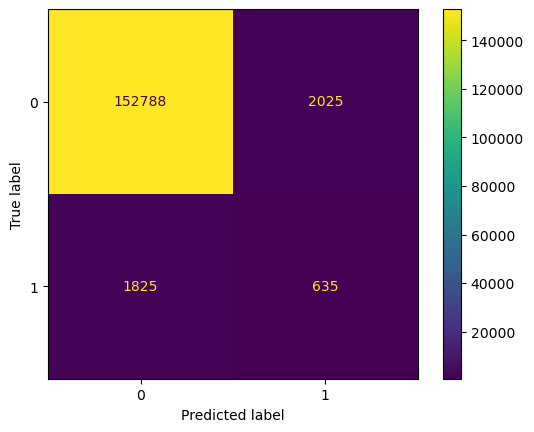

In [21]:
#initialize the model
xgb_model_drop = XGBClassifier(n_estimators=100,scale_pos_weight=10) #give minority class more weight

# Train the model on the training data
xgb_model_drop.fit(x_train_drop_feat, y_train_drop_feat)

#show performance
performance_metrics(xgb_model_drop,x_test_drop_feat,y_test_drop_feat,plot=True)
print('')

**Test different model hyperparameters with a grid or random search**
- sklearn.model_selection.GridSearchCV or sklearn.model_selection.RandomizedSearchCV
- I will use the randomized search since it requires fewer evaluations to see the effect of the hyperparameters on model performance
- I do one search where maximize F1 score and one where maximize recall
- I try this on the full training data set and on the set with the dropped fields
- The best performing model came from maximizing recall and running the search on the training set with the dropped fields. This is because dropping those fields did improve the model and because maximizing the F1 score was increasing precision too much at the expense of recall.

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score:  0.6149513168727766
Accuracy: 0.979 
Precision: 0.295 
Recall: 0.234 
F1 Score: 0.261 
Specificity: 0.991 


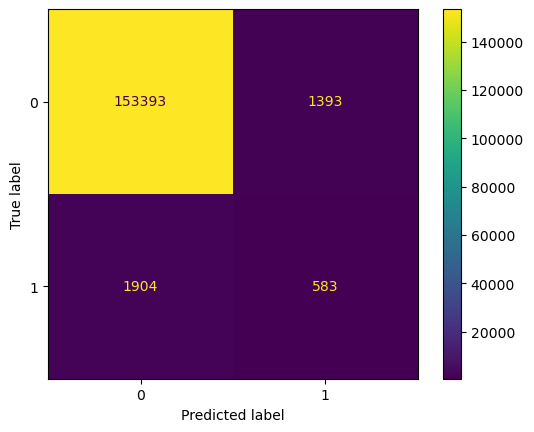

In [14]:
#initialize the model
xgb_model_rs = XGBClassifier(scale_pos_weight=10) 

# set up the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# set up randomized search of hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model_rs,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_macro', 
    cv=3,
    verbose=1,
    n_jobs=-2  # 1 less core than total available
)

# run the search
random_search.fit(x_train, y_train)

# get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

#show performance of best model
best_model = random_search.best_estimator_
performance_metrics(best_model,x_test,y_test,plot=True)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best cross-validation score:  0.2569989929506546
Accuracy: 0.970 
Precision: 0.190 
Recall: 0.271 
F1 Score: 0.224 
Specificity: 0.981 


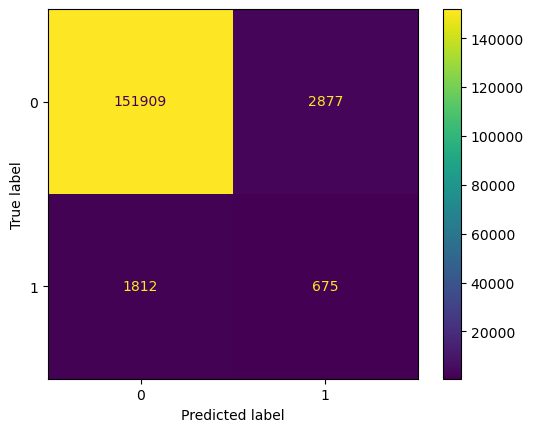

In [18]:
#initialize the model
xgb_model_rs = XGBClassifier(scale_pos_weight=10) 

# set up the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# set up randomized search of hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model_rs,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall', 
    cv=3,
    verbose=1,
    n_jobs=-2  # 1 less core than total available
)

# run the search
random_search.fit(x_train, y_train)

# get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

#show performance of best model
best_model = random_search.best_estimator_
performance_metrics(best_model,x_test,y_test,plot=True)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score:  0.6143629425863633
Accuracy: 0.976 
Precision: 0.252 
Recall: 0.284 
F1 Score: 0.267 
Specificity: 0.987 


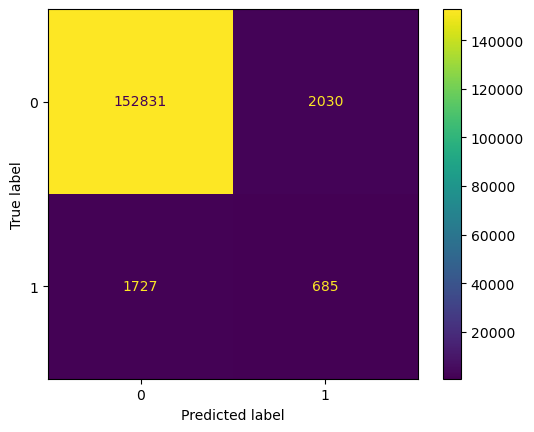

In [19]:
#initialize the model
xgb_model_rs_drop = XGBClassifier(scale_pos_weight=10) 

# set up the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# set up randomized search of hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model_rs_drop,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_macro', 
    cv=3,
    verbose=1,
    n_jobs=-2  # 1 less core than total available
)

# run the search
random_search.fit(x_train_drop_feat, y_train_drop_feat)

# get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

#show performance of best model
best_model = random_search.best_estimator_
performance_metrics(best_model,x_test_drop_feat,y_test_drop_feat,plot=True)


Best parameters found:  {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score:  0.2647676161919041
Accuracy: 0.975 
Precision: 0.289 
Recall: 0.390 
F1 Score: 0.332 
Specificity: 0.985 


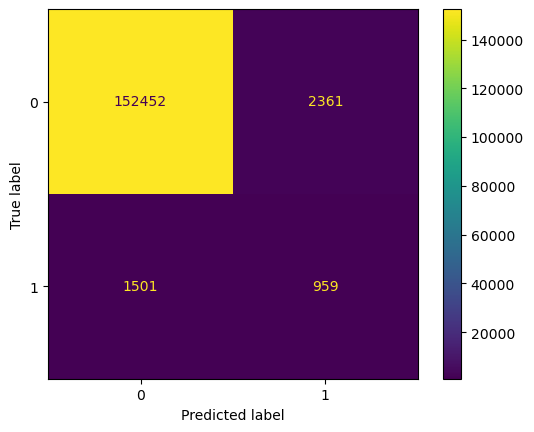

In [28]:
#initialize the model
xgb_model_rs_drop = XGBClassifier(scale_pos_weight=10)

# set up the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# set up randomized search of hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_model_rs_drop,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall', 
    cv=3,
    verbose=1,
    n_jobs=-2  # 1 less core than total available
)

# run the search
random_search.fit(x_train_drop_feat, y_train_drop_feat)

# get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

#show performance of best model
best_model = random_search.best_estimator_
performance_metrics(best_model,x_test_drop_feat,y_test_drop_feat,plot=True)


Overall, the best model I have found so far for this data set is the above model where I use XGBoost, increase the weighting for the minority class by 10, drop the 'acqCountry'/'currentBalance'/'timeToExpDate1mon'/'timeSinceAddChange1yr' fields, and use the following hyper-parameters which were identified by maximizing recall: 'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.8. 

**Finalize and save the model**
- It is important to always save your best models so you don't have to re-run time consuming code and to be able to share your models to add to production pipelines.

In [29]:
joblib.dump(best_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

In [32]:
#read back in if necessary
loaded_model = joblib.load('best_xgb_model.pkl')


**Try a couple anomaly detection methods**
- I am not satisfied with the performance of the XGBoost method, so I will test two anomaly detection methods (isolation forest, one class SVM) with the dropped field training set and see if these methods dramatically improve performance. Unless these dramatically improve performance, I will not do a full search over possible hyper-parameters or the impact of various features. If I had more time, I would investigate these methods further.
- Note that training SVM models is very slow relative to tree-based methods, especially for training data sets of this size. Generally, the training time for SVM methods goes like n^2 whereas the time for tree-based methods goes like n log(n). You can potentially get around this by a random subset of the training data in training SVM methods. This is because only data points near the decision boundary matter when training SVM methods. So, you could implement bagging (bootstrap+aggregation) with smaller sample sizes to reduce the training time for SVMs. I might have experimented with this if I had time.

In [53]:
def performance_metrics_anomaly(model,XTEST,YTEST,plot=True):
    # Predict on the test data
    y_pred_init = model.predict(XTEST)
    #in an anomaly detection method outliers/fraud=True are labeled as -1 and inliers/fraud=False as 1
    #reformat to match y_test formatting with no fraud from 1->0 and fraud from -1->1  
    y_pred=pd.Series(y_pred_init).replace(1,0).replace(-1,1)
    
    # Calculate and print performance metrics
    #Accuracy
    acc=sklearn.metrics.accuracy_score(YTEST, y_pred)
    print(r'Accuracy: {:2.3f} '.format(acc))
    #Precision
    prec=sklearn.metrics.precision_score(YTEST, y_pred)
    print(r'Precision: {:2.3f} '.format(prec))
    #Recall
    rec=sklearn.metrics.recall_score(YTEST, y_pred)
    print(r'Recall: {:2.3f} '.format(rec))
    #F1
    f1=sklearn.metrics.f1_score(YTEST, y_pred)
    print(r'F1 Score: {:2.3f} '.format(f1))
    
    # Generate the confusion matrix
    cm = confusion_matrix(YTEST, y_pred)
    TN=cm[0][0]
    FP=cm[0][1]
    FN=cm[1][0]
    TP=cm[1][1]
    
    #Specificity
    spec=TN/(TN+FP)
    print(r'Specificity: {:2.3f} '.format(spec))
    
    if plot:
        # Display the confusion matrix
        ConfusionMatrixDisplay(confusion_matrix=cm).plot()


0.01579041740264992
Accuracy: 0.969 
Precision: 0.026 
Recall: 0.027 
F1 Score: 0.026 
Specificity: 0.984 


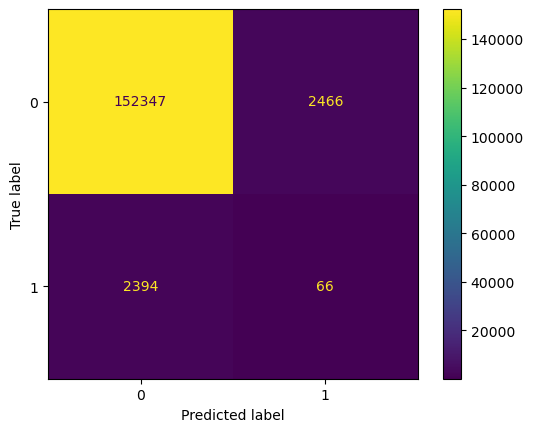

In [51]:
#initialize the model
contamination=len(training_no_one_hot.query('isFraud==1'))/len(training_no_one_hot)
print(contamination)
if_model = IsolationForest(contamination=contamination)

# Train the model on the training data
if_model.fit(x_train_drop_feat, y_train_drop_feat)

#show performance
performance_metrics_anomaly(if_model,x_test_drop_feat,y_test_drop_feat)


Accuracy: 0.888 
Precision: 0.020 
Recall: 0.131 
F1 Score: 0.035 
Specificity: 0.900 


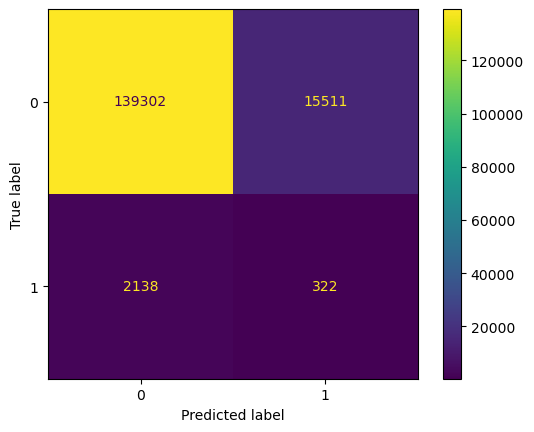

In [55]:
#initialize the model
svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)

# Train the model on the training data
svm_model.fit(x_train_drop_feat, y_train_drop_feat)

#show performance
performance_metrics_anomaly(svm_model,x_test_drop_feat,y_test_drop_feat)


**Experiment with deep learning**
- Because the anomaly detection methods did not show significant improvement, I will also test a few configurations of deep learning methods. I will test a few different evaluation methods (combinations of recall, precision, and F1-score) and different layer structures. But I will not do a full hyper-parameter search unless these models show significant improvements over the XGBoost method. If I had more time, I might do a more thorough investigation of varying the deep learning model parameters.


In [18]:
def performance_metrics_tensorflow(model,XTEST,YTEST,plot=True):
    # Predict on the test data
    y_pred_init = model.predict(XTEST)
    #the neural network returns probabilities that the transaction is fraud
    #convert probabilities to binary prediction
    y_pred=(y_pred_init > 0.5).astype("int32")
    
    # Calculate and print performance metrics
    #Accuracy
    acc=sklearn.metrics.accuracy_score(YTEST, y_pred)
    print(r'Accuracy: {:2.3f} '.format(acc))
    #Precision
    prec=sklearn.metrics.precision_score(YTEST, y_pred)
    print(r'Precision: {:2.3f} '.format(prec))
    #Recall
    rec=sklearn.metrics.recall_score(YTEST, y_pred)
    print(r'Recall: {:2.3f} '.format(rec))
    #F1
    f1=sklearn.metrics.f1_score(YTEST, y_pred)
    print(r'F1 Score: {:2.3f} '.format(f1))
    
    # Generate the confusion matrix
    cm = confusion_matrix(YTEST, y_pred)
    TN=cm[0][0]
    FP=cm[0][1]
    FN=cm[1][0]
    TP=cm[1][1]
    
    #Specificity
    spec=TN/(TN+FP)
    print(r'Specificity: {:2.3f} '.format(spec))
    
    if plot:
        # Display the confusion matrix
        ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Epoch 1/10
15728/15728 [==============================] - 9s 578us/step - loss: 0.0751 - recall_1: 0.0015 - precision_1: 0.0769 - val_loss: 0.0729 - val_recall_1: 0.0035 - val_precision_1: 0.6364
Epoch 2/10
15728/15728 [==============================] - 9s 575us/step - loss: 0.0727 - recall_1: 0.0093 - precision_1: 0.7009 - val_loss: 0.0720 - val_recall_1: 0.0161 - val_precision_1: 0.6957
Epoch 3/10
15728/15728 [==============================] - 9s 585us/step - loss: 0.0718 - recall_1: 0.0188 - precision_1: 0.7488 - val_loss: 0.0712 - val_recall_1: 0.0181 - val_precision_1: 0.7660
Epoch 4/10
15728/15728 [==============================] - 9s 569us/step - loss: 0.0712 - recall_1: 0.0227 - precision_1: 0.7148 - val_loss: 0.0708 - val_recall_1: 0.0276 - val_precision_1: 0.6250
Epoch 5/10
15728/15728 [==============================] - 9s 567us/step - loss: 0.0707 - recall_1: 0.0258 - precision_1: 0.7197 - val_loss: 0.0704 - val_recall_1: 0.0146 - val_precision_1: 0.7436
Epoch 6/10
15728/157

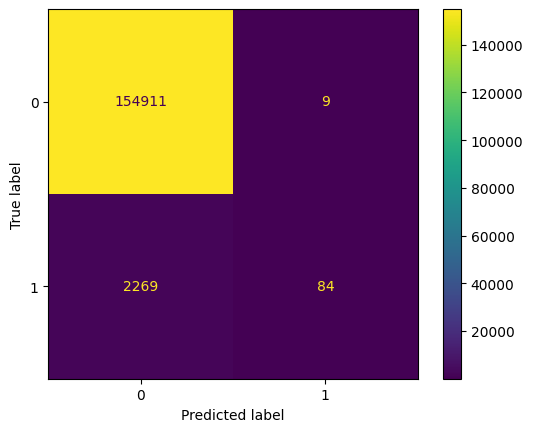

In [25]:
#initialize the model
tf_model = Sequential()
tf_model.add(Dense(64, activation='relu', input_shape=(x_train_drop_feat.shape[1],)))
tf_model.add(Dense(32, activation='relu'))
tf_model.add(Dense(1, activation='sigmoid'))  # use sigmoid for binary classification
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(),Precision()])
#adam is generally one of the best choices for optimizer since it is the most versatile and typically
#converges faster with better performance than traditional optimizers like SGD
#binary crossentropy is a good loss function choice for classification with two classes

# Train the model on the training data
# don't run for too many epochs
#I am just trying to get a sense of whether this approach can yield dramatic improvement
tf_model.fit(x_train_drop_feat, y_train_drop_feat, epochs=10, batch_size=32, validation_split=0.2)

#show performance
performance_metrics_tensorflow(tf_model,x_test_drop_feat,y_test_drop_feat)

#this model is prioritizing precision at the expense of recall

Epoch 1/10
15728/15728 [==============================] - 10s 634us/step - loss: 0.0757 - f1_score: 3.5980e-04 - val_loss: 0.0729 - val_f1_score: 6.7820e-04
Epoch 2/10
15728/15728 [==============================] - 10s 608us/step - loss: 0.0727 - f1_score: 0.0033 - val_loss: 0.0726 - val_f1_score: 0.0055
Epoch 3/10
15728/15728 [==============================] - 9s 601us/step - loss: 0.0717 - f1_score: 0.0081 - val_loss: 0.0711 - val_f1_score: 0.0067
Epoch 4/10
15728/15728 [==============================] - 10s 611us/step - loss: 0.0708 - f1_score: 0.0097 - val_loss: 0.0709 - val_f1_score: 0.0093
Epoch 5/10
15728/15728 [==============================] - 10s 613us/step - loss: 0.0703 - f1_score: 0.0125 - val_loss: 0.0719 - val_f1_score: 0.0166
Epoch 6/10
15728/15728 [==============================] - 9s 604us/step - loss: 0.0698 - f1_score: 0.0136 - val_loss: 0.0697 - val_f1_score: 0.0135
Epoch 7/10
15728/15728 [==============================] - 9s 604us/step - loss: 0.0695 - f1_score: 0

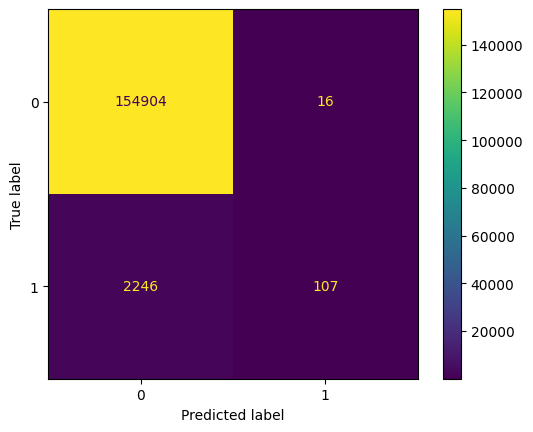

In [32]:
def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    precision = tp / (K.sum(y_pred) + K.epsilon())
    recall = tp / (K.sum(y_true) + K.epsilon())
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

#initialize the model
tf_model = Sequential()
tf_model.add(Dense(50, activation='relu', input_shape=(x_train_drop_feat.shape[1],)))
tf_model.add(Dense(25, activation='relu'))
tf_model.add(Dense(10, activation='relu'))
tf_model.add(Dense(1, activation='sigmoid'))  # use sigmoid for binary classification
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_score])

# Train the model on the training data
# don't run for too many epochs
#I am just trying to get a sense of whether this approach can yield dramatic improvement
tf_model.fit(x_train_drop_feat, y_train_drop_feat, epochs=10, batch_size=32, validation_split=0.2)

#show performance
performance_metrics_tensorflow(tf_model,x_test_drop_feat,y_test_drop_feat)

#this model is prioritizing precision at the expense of recall

Epoch 1/10
15728/15728 [==============================] - 11s 711us/step - loss: 0.0753 - recall_2: 6.1935e-04 - f1_score: 2.5432e-04 - val_loss: 0.0741 - val_recall_2: 0.0015 - val_f1_score: 6.7820e-04
Epoch 2/10
15728/15728 [==============================] - 10s 636us/step - loss: 0.0728 - recall_2: 0.0089 - f1_score: 0.0040 - val_loss: 0.0721 - val_recall_2: 0.0116 - val_f1_score: 0.0045
Epoch 3/10
15728/15728 [==============================] - 10s 625us/step - loss: 0.0721 - recall_2: 0.0177 - f1_score: 0.0077 - val_loss: 0.0718 - val_recall_2: 0.0171 - val_f1_score: 0.0066
Epoch 4/10
15728/15728 [==============================] - 10s 619us/step - loss: 0.0715 - recall_2: 0.0213 - f1_score: 0.0095 - val_loss: 0.0721 - val_recall_2: 0.0196 - val_f1_score: 0.0079
Epoch 5/10
15728/15728 [==============================] - 10s 621us/step - loss: 0.0710 - recall_2: 0.0259 - f1_score: 0.0112 - val_loss: 0.0703 - val_recall_2: 0.0206 - val_f1_score: 0.0083
Epoch 6/10
15728/15728 [=========

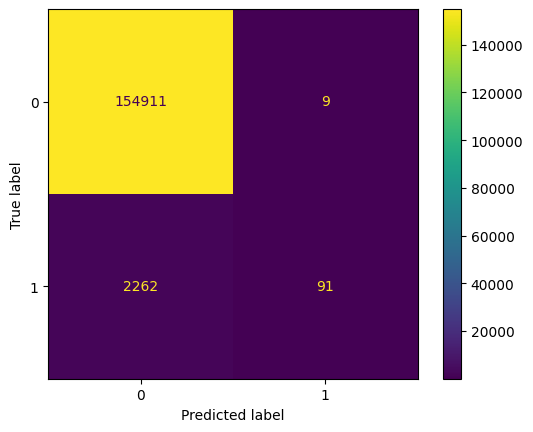

In [33]:
#initialize the model
tf_model = Sequential()
tf_model.add(Dense(50, activation='relu', input_shape=(x_train_drop_feat.shape[1],)))
tf_model.add(Dense(25, activation='relu'))
tf_model.add(Dense(10, activation='relu'))
tf_model.add(Dense(1, activation='sigmoid'))  # use sigmoid for binary classification
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(),f1_score])

# Train the model on the training data
# don't run for too many epochs
#I am just trying to get a sense of whether this approach can yield dramatic improvement
tf_model.fit(x_train_drop_feat, y_train_drop_feat, epochs=10, batch_size=32, validation_split=0.2)

#show performance
performance_metrics_tensorflow(tf_model,x_test_drop_feat,y_test_drop_feat)

#this model is still prioritizing precision at the expense of recall
#but shows some signs of improvement after 10 epochs, so I will run for longer

Epoch 1/50
15728/15728 [==============================] - 10s 637us/step - loss: 0.0750 - recall_5: 4.9548e-04 - f1_score: 1.9074e-04 - val_loss: 0.0729 - val_recall_5: 0.0035 - val_f1_score: 0.0016
Epoch 2/50
15728/15728 [==============================] - 10s 627us/step - loss: 0.0729 - recall_5: 0.0030 - f1_score: 0.0012 - val_loss: 0.0737 - val_recall_5: 0.0030 - val_f1_score: 0.0014
Epoch 3/50
15728/15728 [==============================] - 10s 629us/step - loss: 0.0722 - recall_5: 0.0085 - f1_score: 0.0038 - val_loss: 0.0718 - val_recall_5: 0.0156 - val_f1_score: 0.0061
Epoch 4/50
15728/15728 [==============================] - 10s 628us/step - loss: 0.0716 - recall_5: 0.0186 - f1_score: 0.0083 - val_loss: 0.0715 - val_recall_5: 0.0181 - val_f1_score: 0.0072
Epoch 5/50
15728/15728 [==============================] - 10s 641us/step - loss: 0.0713 - recall_5: 0.0211 - f1_score: 0.0089 - val_loss: 0.0707 - val_recall_5: 0.0206 - val_f1_score: 0.0083
Epoch 6/50
15728/15728 [=============

Epoch 44/50
15728/15728 [==============================] - 10s 620us/step - loss: 0.0673 - recall_5: 0.0520 - f1_score: 0.0227 - val_loss: 0.0695 - val_recall_5: 0.0502 - val_f1_score: 0.0206
Epoch 45/50
15728/15728 [==============================] - 10s 620us/step - loss: 0.0673 - recall_5: 0.0514 - f1_score: 0.0221 - val_loss: 0.0699 - val_recall_5: 0.0427 - val_f1_score: 0.0179
Epoch 46/50
15728/15728 [==============================] - 10s 621us/step - loss: 0.0673 - recall_5: 0.0507 - f1_score: 0.0222 - val_loss: 0.0709 - val_recall_5: 0.0437 - val_f1_score: 0.0182
Epoch 47/50
15728/15728 [==============================] - 10s 618us/step - loss: 0.0673 - recall_5: 0.0536 - f1_score: 0.0229 - val_loss: 0.0700 - val_recall_5: 0.0407 - val_f1_score: 0.0170
Epoch 48/50
15728/15728 [==============================] - 10s 622us/step - loss: 0.0673 - recall_5: 0.0520 - f1_score: 0.0222 - val_loss: 0.0694 - val_recall_5: 0.0618 - val_f1_score: 0.0263
Epoch 49/50
15728/15728 [===============

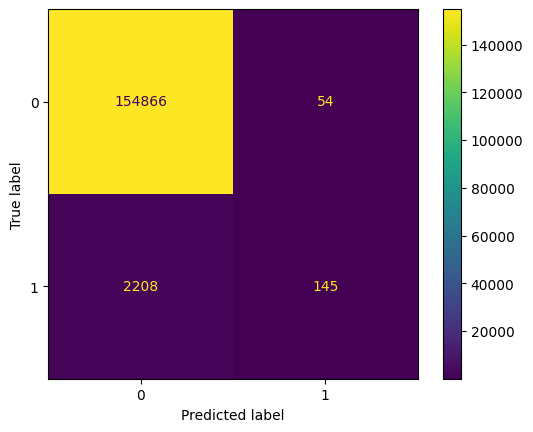

In [36]:
#initialize the model
tf_model = Sequential()
tf_model.add(Dense(50, activation='relu', input_shape=(x_train_drop_feat.shape[1],)))
tf_model.add(Dense(25, activation='relu'))
tf_model.add(Dense(10, activation='relu'))
tf_model.add(Dense(1, activation='sigmoid'))  # use sigmoid for binary classification
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(),f1_score])

# Train the model on the training data
# don't run for too many epochs
#I am just trying to get a sense of whether this approach can yield dramatic improvement
tf_model.fit(x_train_drop_feat, y_train_drop_feat, epochs=50, batch_size=32, validation_split=0.2)

#show performance
performance_metrics_tensorflow(tf_model,x_test_drop_feat,y_test_drop_feat)


After about 30 epochs, the best deep learning method (metrics= BOTH recall and F1-score so the network doesn't just prioritize precision) stopped continuously improving in recall and F1-score, so it seems to have reached its limiting performance. The best deep learning method is still far inferior to my best XGBoost model. So, I will not pursue deep learning further. 

b) Provide an estimate of performance using an appropriate sample, and show your work.
c) Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

**Answer to b) contd.**
- Since this is an imbalanced data set we want to prioritize precision, recall, and F1 score over accuracy. High precision minimizes false positives which would result in unnecessary fraud investigations. High recall minimizes false negatives which would result in missing cases of fraud. There is typically a trade-off between precision and recall where increasing one decreases the other. I will prioritize recall over precision a bit because usually when a transaction is flagged as fraudulent, credit card companies can just send a confirmation to the customer's phone or email. Sending this confirmation is not too costly to Capital One and is not too much of a nuisance for customers trying to make legitimate purchases. On the other side, if a case of fraud is missed, a customer will be far more inconvenienced and dealing with the case will become more costly for Capital One. But, I still want a balance between precision and recall to not have too many legitimate purchases flagged as fraud. I will not consider accuracy since this will generically be high given that most of the transactions are legitimate.
- I evaluate the performance metrics on the test sample, which was not used to build the model and is thus a better data set to use for model evaluation.
- The best performing model was created using XGBoost, by increasing the weighting for the minority class by 10, dropping the 'acqCountry'/'currentBalance'/'timeToExpDate1mon'/'timeSinceAddChange1yr' fields, and using the following hyper-parameters which were identified by maximizing recall: 'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.8. This best model is saved as 'best_xgb_model.pkl'.
- For the final model, the perfomance metrics I used were: 
    - Recall= 0.390
    - F1 score= 0.332
    - Precision= 0.289
    This is "ok" performance. I do not know the limitations of the underlying data set, and it is completely possible to have noise sources that really do limit fraud detection to ~40% of fraud cases. It might be possible to get around these limitations by looking into techniques to remove noise from data or more complicated deep learning approaches.


**Answer to c) contd.**
- modeling algorithm/method used and why: I tested a variety of models, starting with more classic machine learning models that are quick to train, suitable for imbalanced data sets, and more interpretable than deep learning approaches. I found that XGBoost was the best model for this fraud detection data set, since this model had the highest recall and F1-score and was capable of maintaining a balance between precision and recall. This matched my initial intuition that this method would be well-suited for this case, since all other approaches did not perform as well.
- what features/data you found useful: I found all features that I created (described in depth above) useful except for the 'acqCountry'/'currentBalance'/'timeToExpDate1mon'/'timeSinceAddChange1yr' fields, which slightly decreased model performance and were removed from the final model. This improvement may be because these features are not strongly correlated with the presence of fraud. For example, fraudsters might not care about the current balance on a card since they would not be worried about going over the card's credit limit.
- what questions you have: 
    - What performance metrics do you prioritize when evaluating fraud detection models at Capital One?
    - How does Capital One typically deploy machine learning models in production, especially for sensitive applications like fraud detection?
- what you would do next with more time: I elaborated on this above, but here are some possible new avenues to explore if I had more time
    - Further testing for the anomaly detection and deep learning methods to see if varying the input features and hyper-parameters could improve performance
    - Further development of new features, such as including a flag for multi-swipes and reversed purchases
    - Further investigation of patterns within missed fraud cases, such as plotting features for these missed cases or training models specifically on the missed cases
